In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [3]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        
        max_weight = max(max_weight, weight1, weight2)
        min_weight = min(min_weight, weight1, weight2)
    print(excel)
    graphs.append(G)

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1149   1191
2    AGATTI ISLAND          KOCHI   1119      0
3        AHMEDABAD      BENGALURU  15121  15616
4        AHMEDABAD        CHENNAI  12596  12319
5        AHMEDABAD     COIMBATORE    917      0
..             ...            ...    ...    ...
309       VADODARA      HYDERABAD    390    451
310       VADODARA        KOLKATA    928      0
311       VADODARA        LUCKNOW    312    190
312       VADODARA         MUMBAI  23588  21110
313     VIJAYAWADA  VISAKHAPATNAM   1132   2241

[313 rows x 4 columns]
Raw_Data/1607.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    508    486
2    AGATTI ISLAND          KOCHI   1052      0
3        AHMEDABAD      BENGALURU  18138  17567
4        AHMEDABAD        CHENNAI  14057  13683
5        AHMEDABAD     COIMBATORE    830      

             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1185   1073
2         AGARTALA           PUNE    125      0
3         AGARTALA  VISAKHAPATNAM     58      0
4    AGATTI ISLAND          KOCHI    590    604
5             AGRA          DELHI      0     94
..             ...            ...    ...    ...
363       VADODARA        LUCKNOW    399    286
364       VADODARA      MANGALORE     74      0
365       VADODARA         MUMBAI  25035  21401
366       VADODARA  VISAKHAPATNAM      0     12
367     VIJAYAWADA  VISAKHAPATNAM   2633   2660

[367 rows x 4 columns]
Raw_Data/1708.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1037   1120
2         AGARTALA           PUNE    141      0
3    AGATTI ISLAND          KOCHI    577    652
4             AGRA          DELHI      0     54
5             AGRA      KHAJURAHO     93      

Raw_Data/1809.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2237   2164
2         AGARTALA        CHENNAI   2826   1769
3         AGARTALA           PUNE    192      0
4         AGARTALA  VISAKHAPATNAM     92      0
5    AGATTI ISLAND      BENGALURU     54     28
..             ...            ...    ...    ...
475       VADODARA      MANGALORE     95      0
476       VADODARA         MUMBAI  24676  21300
477       VADODARA     PORT BLAIR      4      0
478       VADODARA          SURAT      5      0
479     VIJAYAWADA  VISAKHAPATNAM   2545   2413

[479 rows x 4 columns]
Raw_Data/1810.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2277   2251
2         AGARTALA        CHENNAI   4064   1791
3         AGARTALA           PUNE    405      0
4         AGARTALA  VISAKHAPATNAM    108      0
5    AGATTI ISLAND      BENG

Raw_Data/1910.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2322  2606
2      AGARTALA       BAGDOGRA     0   141
3      AGARTALA      BENGALURU  3948  4003
4      AGARTALA        CHENNAI  2318  1402
5      AGARTALA     COIMBATORE     0    18
..          ...            ...   ...   ...
556    TIRUPATI     VIJAYAWADA    77   106
557  TRIVANDRUM       VARANASI     9     0
558     UDAIPUR  VISAKHAPATNAM     7     0
559    VARANASI  VISAKHAPATNAM     0    88
560  VIJAYAWADA  VISAKHAPATNAM  1618  1516

[560 rows x 4 columns]
Raw_Data/1911.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2600  2525
2      AGARTALA      BENGALURU  3690  2854
3      AGARTALA        CHENNAI  2280  1327
4      AGARTALA     COIMBATORE     0     3
5      AGARTALA          DELHI  5480  5399
..          ...            ...   ...   ...
528       SURAT        UDAIPUR  1126 

Raw_Data/2012.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI   939   863
2       ADAMPUR         KANDLA     0     4
3       ADAMPUR         MUMBAI   912   558
4      AGARTALA      BENGALURU  4214  3504
5      AGARTALA        CHENNAI   961  1138
..          ...            ...   ...   ...
464      RAIPUR  VISAKHAPATNAM   369     0
465    SRINAGAR          SURAT    69     0
466    TIRUPATI     VIJAYAWADA   770   858
467    TIRUPATI  VISAKHAPATNAM  1490  1699
468  VIJAYAWADA  VISAKHAPATNAM  1621  1364

[468 rows x 4 columns]


In [4]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [5]:
print(passengers)

[7097141.000000199, 6568843.000000199, 6747792, 6735367, 6637323, 7008489, 7289547, 7674872, 7620879, 7443543, 7835402, 7896940, 8623381, 7933791, 8475447, 8349518, 8198645, 8638148, 8941496, 9516243, 9548612, 8615715, 9007696, 9100687, 10140073, 9536983, 9533226, 9663380, 9549437, 10418436, 10453411, 11206075, 11448112, 10720207, 11544833, 11475498, 11818634, 11288337, 11658023, 11319216, 11363706, 11805382, 11606526, 12649810, 12469075, 11321549, 11557816, 10967168, 12151749, 11989365, 11863940, 11756732, 11488069, 12280250, 12910135, 12980408, 12747591, 12331165, 7735665, 0, 278417, 1976228, 2101122, 2824787, 3938688, 5266910, 6342589, 7306064]


In [6]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [7]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

In [26]:
list(graphs[i].nodes())

['AGATTI ISLAND',
 'KOCHI',
 'AHMEDABAD',
 'BENGALURU',
 'BHOPAL',
 'CHENNAI',
 'COIMBATORE',
 'DELHI',
 'DIBRUGARH',
 'GOA',
 'GUWAHATI',
 'HYDERABAD',
 'IMPHAL',
 'INDORE',
 'JAIPUR',
 'KOLKATA',
 'LUCKNOW',
 'MUMBAI',
 'NAGPUR',
 'PUNE',
 'AIZAWL',
 'AMRITSAR',
 'SRINAGAR',
 'BAGDOGRA',
 'BELGAUM',
 'JABALPUR',
 'AGARTALA',
 'CHANDIGARH',
 'DEHRA DUN',
 'HUBLI',
 'JODHPUR',
 'JORHAT',
 'KOZHIKODE',
 'MANGALORE',
 'PATNA',
 'PUDUCHERRY',
 'RAIPUR',
 'RAJAHMUNDRY',
 'RAJKOT',
 'RANCHI',
 'TRIVANDRUM',
 'VARANASI',
 'VIJAYAWADA',
 'VISAKHAPATNAM',
 'BHAVNAGAR',
 'BHUBANESWAR',
 'PORT BLAIR',
 'BHUJ',
 'TIRUCHIRAPALLY',
 'TUTICORIN',
 'ALLAHABAD',
 'AURANGABAD',
 'DHARAMSALA',
 'DIMAPUR',
 'GAYA',
 'GWALIOR',
 'JAMMU',
 'KHAJURAHO',
 'KULLU',
 'LEH',
 'PANTNAGAR',
 'SURAT',
 'TIRUPATI',
 'UDAIPUR',
 'DIU',
 'PORBANDAR',
 'LILABARI',
 'SILCHAR',
 'MADURAI',
 'DURGAPUR',
 'SHILLONG',
 'JAMNAGAR',
 'TEZPUR',
 'VADODARA']

In [40]:
colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(-1,-2,-1):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    pupu= list(graphs[i].degree())
    pupu = [i[1]*30 for i in pupu]
    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw_networkx_nodes(graphs[i], nx.get_node_attributes(graphs[i],'pos'), node_size = pupu, node_color='b', 
            vmin=min_weight, alpha =0.7, vmax=max_weight, label = list(graphs[i].nodes()))
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red", width=0, node_size=0)
    except:
        print("hahaha")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
#     sm._A = []
#     cb = plt.colorbar(sm)
#     cb.ax.tick_params(labelsize=15) 
#     cb.set_label(label='Number of Passengers',weight='bold',size = 20)

    


    plt.title("Airport Network Of India "+ lbls1[i])
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map_trial/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


-1


## Network Visualization

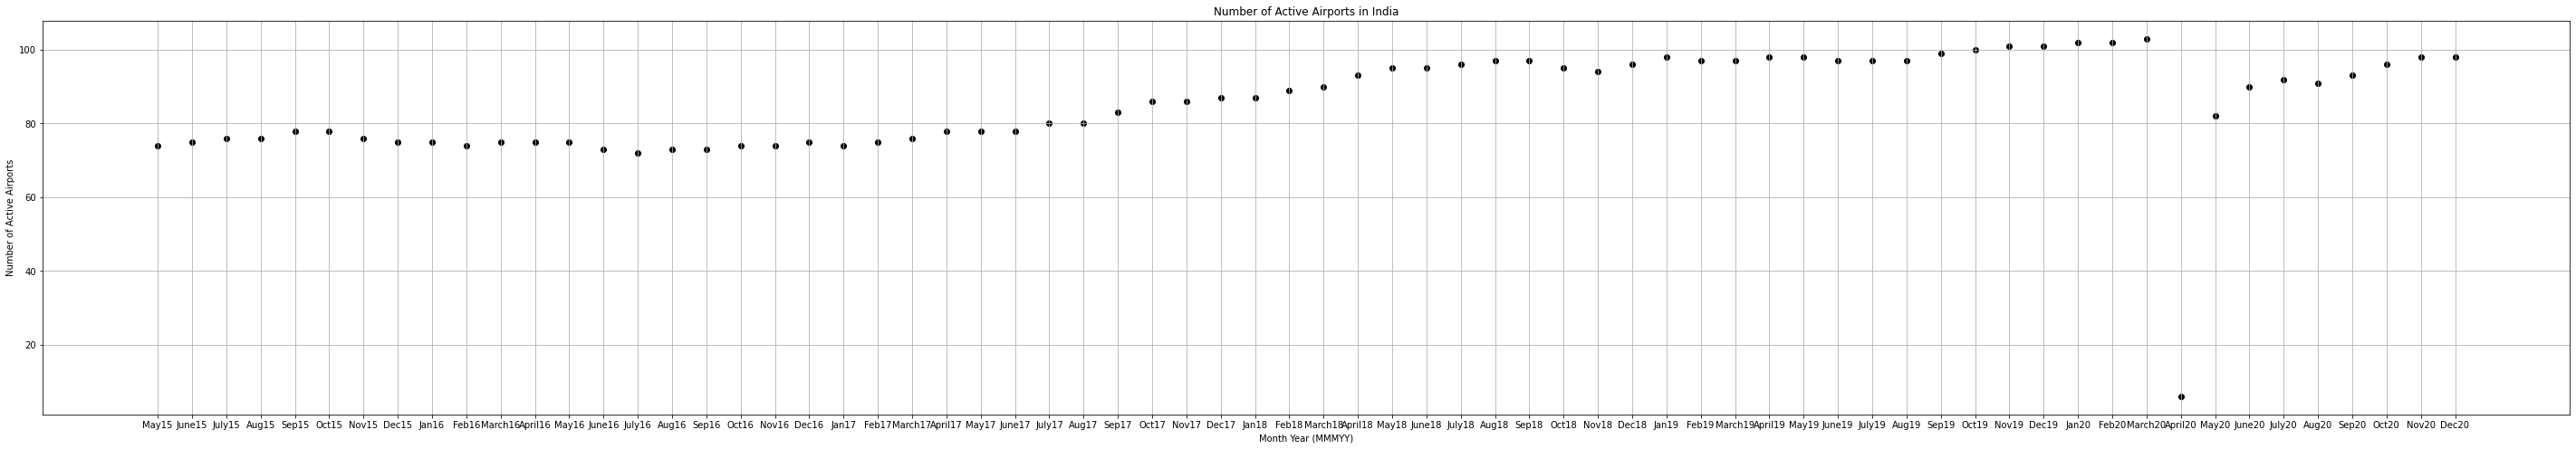

In [6]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

In [25]:
for i in range(len(nodes)):
    print(nodes[i],lbls1[i])

74 May15
75 June15
76 July15
76 Aug15
78 Sep15
78 Oct15
76 Nov15
75 Dec15
75 Jan16
74 Feb16
75 March16
75 April16
75 May16
73 June16
72 July16
73 Aug16
73 Sep16
74 Oct16
74 Nov16
75 Dec16
74 Jan17
75 Feb17
76 March17
78 April17
78 May17
78 June17
80 July17
80 Aug17
83 Sep17
86 Oct17
86 Nov17
87 Dec17
87 Jan18
89 Feb18
90 March18
93 April18
95 May18
95 June18
96 July18
97 Aug18
97 Sep18
95 Oct18
94 Nov18
96 Dec18
98 Jan19
97 Feb19
97 March19
98 April19
98 May19
97 June19
97 July19
97 Aug19
99 Sep19
100 Oct19
101 Nov19
101 Dec19
102 Jan20
102 Feb20
103 March20
6 April20
82 May20
90 June20
92 July20
91 Aug20
93 Sep20
96 Oct20
98 Nov20
98 Dec20


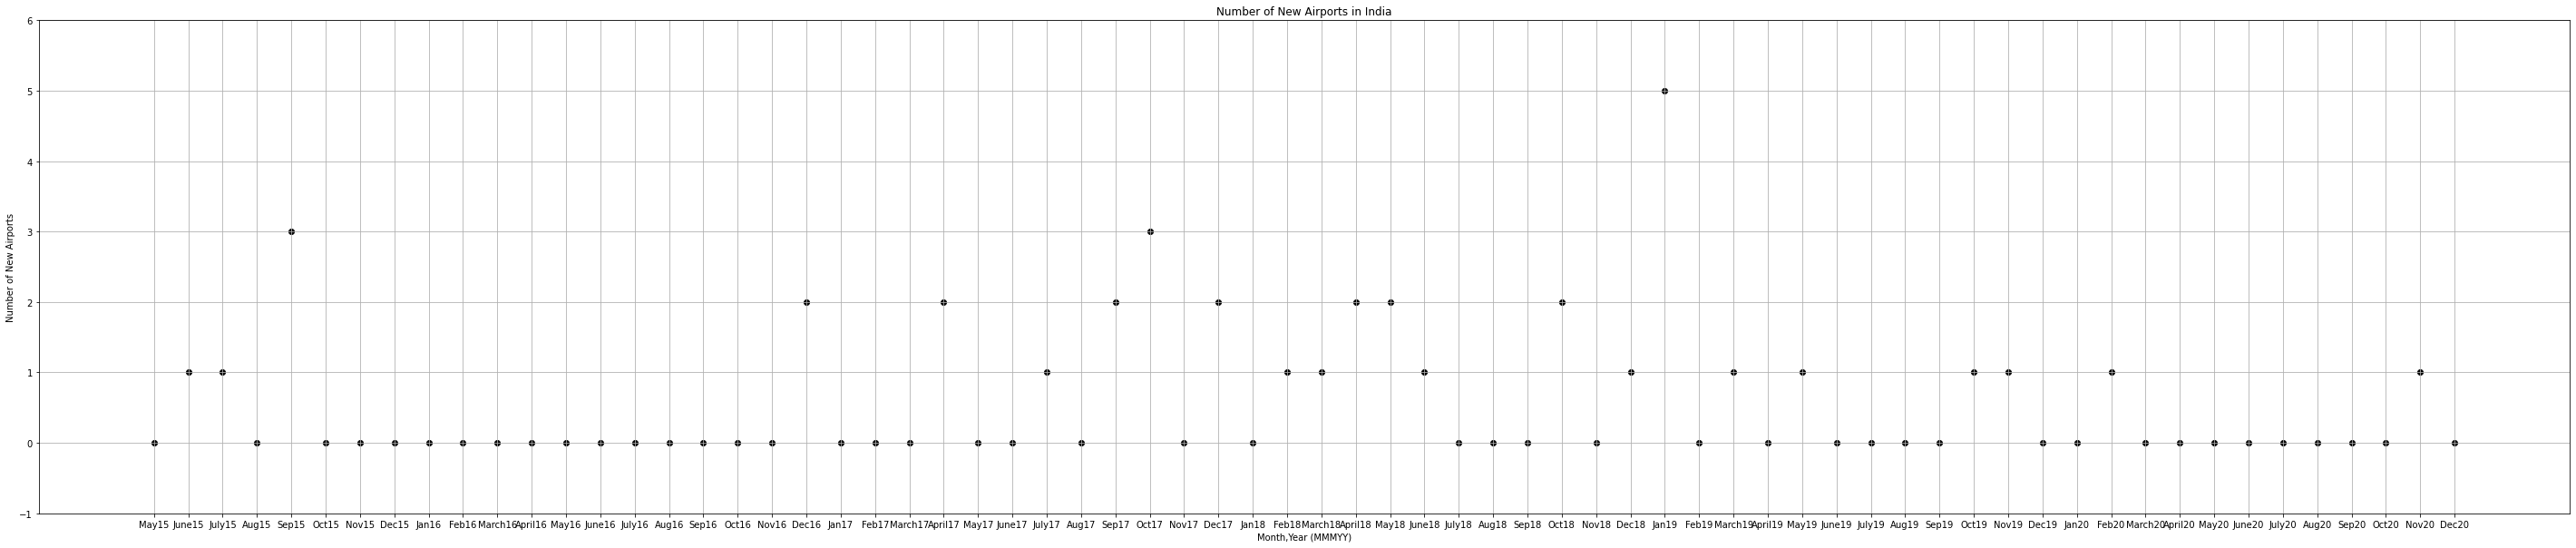

In [7]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()

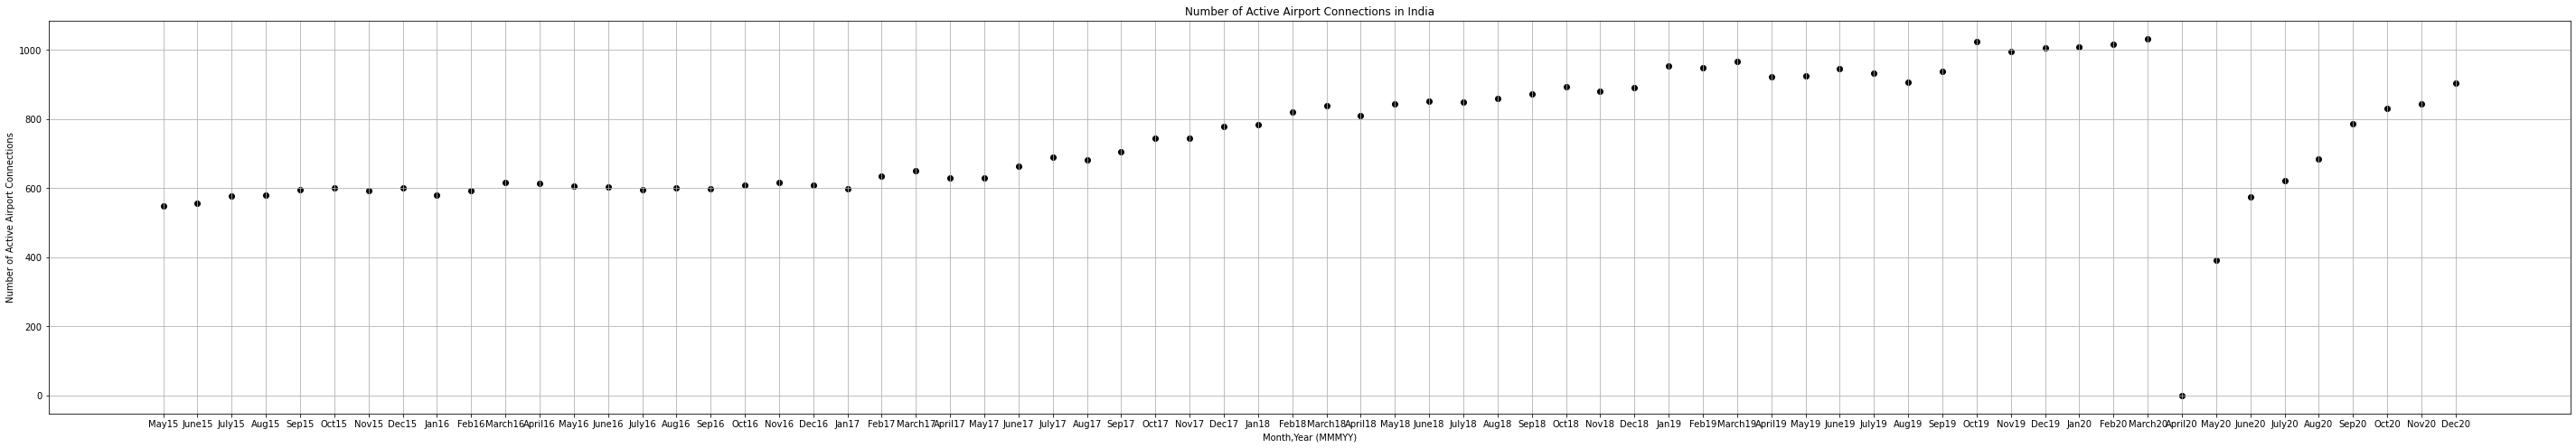

In [27]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

In [28]:
for i in range(len(edges)):
    print(edges[i],lbls1[i])

548 May15
556 June15
578 July15
580 Aug15
596 Sep15
602 Oct15
594 Nov15
601 Dec15
581 Jan16
594 Feb16
617 March16
613 April16
605 May16
603 June16
596 July16
601 Aug16
598 Sep16
608 Oct16
617 Nov16
610 Dec16
599 Jan17
635 Feb17
652 March17
629 April17
629 May17
665 June17
690 July17
681 Aug17
706 Sep17
746 Oct17
744 Nov17
780 Dec17
784 Jan18
821 Feb18
840 March18
810 April18
845 May18
852 June18
849 July18
861 Aug18
873 Sep18
894 Oct18
881 Nov18
891 Dec18
954 Jan19
949 Feb19
967 March19
922 April19
925 May19
945 June19
932 July19
907 Aug19
939 Sep19
1025 Oct19
995 Nov19
1005 Dec19
1008 Jan20
1017 Feb20
1033 March20
0 April20
391 May20
574 June20
621 July20
684 Aug20
787 Sep20
830 Oct20
845 Nov20
904 Dec20


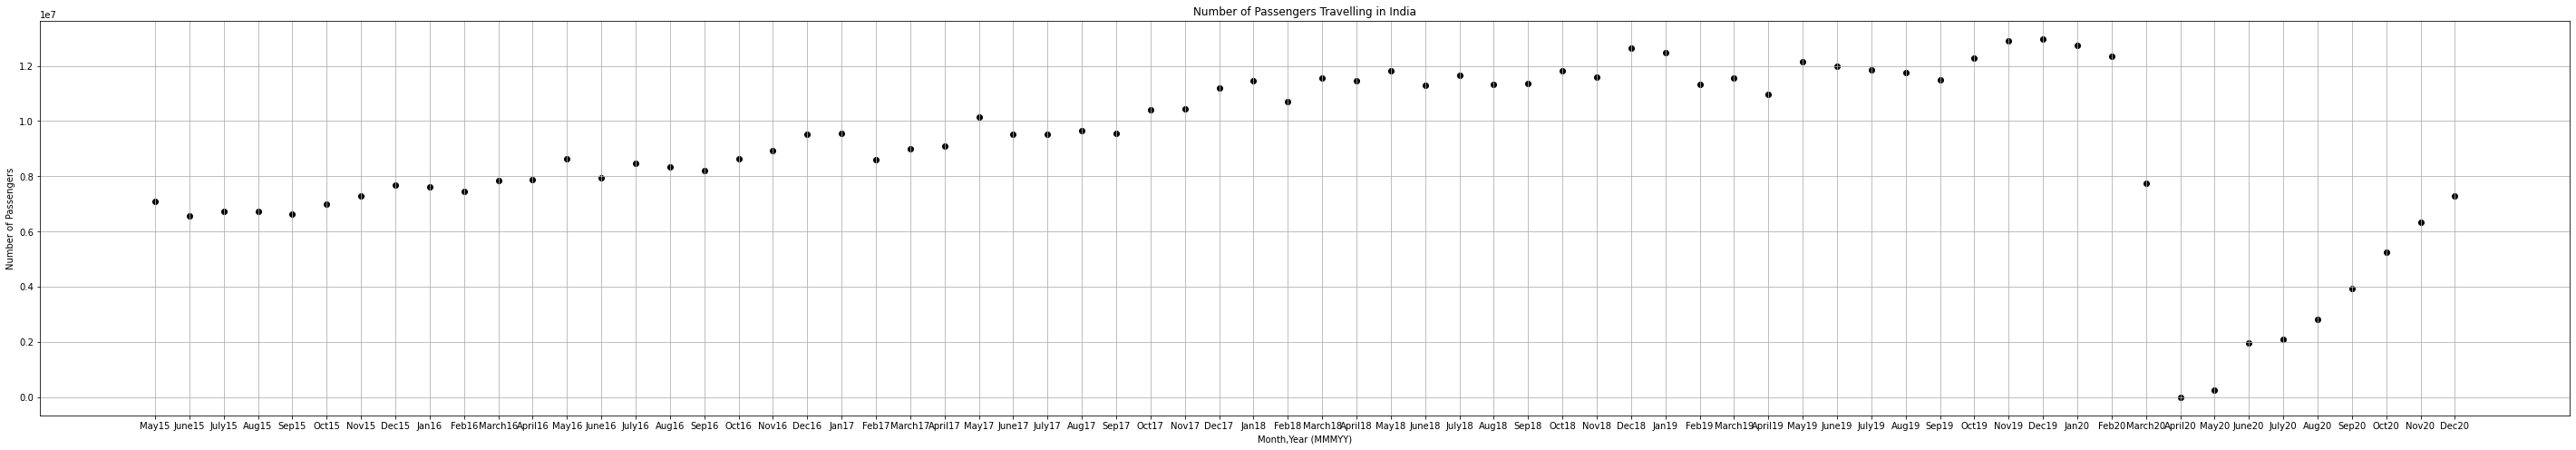

In [8]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [8]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness)):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))
    print()


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
SRINAGAR -> 0.005607197216786257
VARANASI -> 0.005260654490106544
VISAKHAPATNAM -> 0.0036611219830397913
IMPHAL -> 0.0031661530377283796
INDORE -> 0.002348578932483042
PUNE -> 0.0020216124882220764
TRIVANDRUM -> 0.0014929314301460421
BELGAUM -> 0.0008534464013916067
JAMMU -> 0.0008085996955859969
RAIPUR -> 0.000801880239665628
JABALPUR -> 0.0007875876026560957
NAGPUR -> 0.0006766286732040155
COIMBATORE -> 0.0005369567013402629
BHUBANESWAR -> 0.0005204935855620788
LUCKNOW -> 0.00047564687975646877
CHANDIGARH -> 0.0004697579183880554
GOA -> 0.0002711963328401683
DIBRUGARH -> 0.0001902587519025875
JAIPUR -> 0.00018497378657196008
KOZHIKODE -> 0.00014948901935203302
A

Top 10 nodes
DELHI -> 0.3731989989124691
MUMBAI -> 0.23178630624406873
KOLKATA -> 0.13256901647312605
BENGALURU -> 0.12812538277720917
CHENNAI -> 0.07878333403447559
HYDERABAD -> 0.04222816493079051
GUWAHATI -> 0.03373963259808009
KHAJURAHO -> 0.0136986301369863
KOCHI -> 0.00924966818231658
VARANASI -> 0.007582264260346451
AHMEDABAD -> 0.007252228470835778
SRINAGAR -> 0.005090327607450894
PUNE -> 0.0043417795843594936
IMPHAL -> 0.0031606072559268892
GOA -> 0.0020173673569792295
MANGALORE -> 0.0019104394675170926
VISAKHAPATNAM -> 0.0018509458577951729
INDORE -> 0.0018354156624704565
JAIPUR -> 0.0009277379140392839
JAMMU -> 0.0008878741755454083
TRIVANDRUM -> 0.0008833579324446906
BHUBANESWAR -> 0.000819924621294484
COIMBATORE -> 0.0008090526926143364
CHANDIGARH -> 0.000716517754188987
RAIPUR -> 0.0006021222773505878
AGARTALA -> 0.00044393708777270424
AMRITSAR -> 0.000325025367833587
NAGPUR -> 0.00031333878365841824
DIBRUGARH -> 0.0002536783358701167
LUCKNOW -> 0.0002536783358701167
PATN

Top 10 nodes
DELHI -> 0.3619705774886861
MUMBAI -> 0.18958415438797732
CHENNAI -> 0.10660091864317214
KOLKATA -> 0.10139239700607909
BENGALURU -> 0.09988372235857138
HYDERABAD -> 0.05658962600109483
GUWAHATI -> 0.03823914125221972
KOCHI -> 0.015190265803947898
SILCHAR -> 0.013682092555331992
SRINAGAR -> 0.0050852735460381335
VARANASI -> 0.004490754048098112
VISAKHAPATNAM -> 0.004137048955962436
VIJAYAWADA -> 0.00387149738256378
GOA -> 0.003644676360974148
PUNE -> 0.0030536822890947636
AHMEDABAD -> 0.0028388077382041164
RAIPUR -> 0.001602580853083871
MANGALORE -> 0.0015350879837801369
JAIPUR -> 0.0015337323083801958
TIRUPATI -> 0.0015004311583788445
JABALPUR -> 0.0012106136653420357
COIMBATORE -> 0.0009530342226519288
AGARTALA -> 0.0008995241289003864
LUCKNOW -> 0.0006696282702318919
INDORE -> 0.000542264576469808
BELGAUM -> 0.0004009772923253809
IMPHAL -> 0.0003973189788079124
TRIVANDRUM -> 0.0003286384976525822
BHUBANESWAR -> 0.0003233687841333716
JAMMU -> 0.00029702021653731916
NAGPU

Top 10 nodes
DELHI -> 0.39298770874113353
MUMBAI -> 0.20930141889045997
BENGALURU -> 0.11307739167328208
KOLKATA -> 0.09504841696622514
CHENNAI -> 0.08450622765691258
GUWAHATI -> 0.07229769079084149
HYDERABAD -> 0.05124570860872233
KOCHI -> 0.027895973272685594
VIJAYAWADA -> 0.027442568538458948
KHAJURAHO -> 0.013513513513513514
VARANASI -> 0.006053533964492869
AHMEDABAD -> 0.0042543761721843916
VISAKHAPATNAM -> 0.003841138087713429
CHANDIGARH -> 0.0030699975905455353
PUNE -> 0.0023655259956629816
RAIPUR -> 0.002225366266462157
SRINAGAR -> 0.0017728589646397864
GOA -> 0.0015586125175166272
COIMBATORE -> 0.0015395948615126698
JABALPUR -> 0.001489415701744469
JAIPUR -> 0.0014121219600671656
MANGALORE -> 0.0013444076800241183
LUCKNOW -> 0.0010463697107532728
AGARTALA -> 0.0009678954884434339
INDORE -> 0.0005280231307628568
JAMMU -> 0.000503928586120367
TRIVANDRUM -> 0.0005020186527035841
BHUBANESWAR -> 0.00038618052316682455
BELGAUM -> 0.0002961865975564606
PATNA -> 0.0002941297461845407


LILABARI -> 0.0
SILCHAR -> 0.0
TEZPUR -> 0.0
NANDED -> 0.0
SHILLONG -> 0.0
DIU -> 0.0
JAMNAGAR -> 0.0
VADODARA -> 0.0

May17
Top 10 nodes
DELHI -> 0.389483849578689
MUMBAI -> 0.19897415469014923
KOLKATA -> 0.11123178247665598
BENGALURU -> 0.10633400453120212
HYDERABAD -> 0.10116912830087811
CHENNAI -> 0.0715715461913343
GUWAHATI -> 0.07112659403329262
KOCHI -> 0.02670719005305471
AHMEDABAD -> 0.005064788348281171
PUNE -> 0.0029612783927548117
CHANDIGARH -> 0.002869672952550601
GOA -> 0.0021752346726714457
JAIPUR -> 0.002096112477178779
SRINAGAR -> 0.002051542670134605
VARANASI -> 0.0019622920938710416
VISAKHAPATNAM -> 0.001860373335937246
MANGALORE -> 0.0016971664698937424
JABALPUR -> 0.0015262847200646244
JAMMU -> 0.0012760588503924117
LUCKNOW -> 0.0011780854142439928
TRIVANDRUM -> 0.0011281647645284012
INDORE -> 0.0011180548774533735
RAIPUR -> 0.0008419439981299176
VIJAYAWADA -> 0.000692619733118708
AGARTALA -> 0.0006450786056049213
MADURAI -> 0.0006077953147331138
DEHRA DUN -> 0.000

AURANGABAD -> 0.0
DHARAMSALA -> 0.0
DIBRUGARH -> 0.0
DIMAPUR -> 0.0
GAYA -> 0.0
GWALIOR -> 0.0
JORHAT -> 0.0
LUDHIANA -> 0.0
PANTNAGAR -> 0.0
SIMLA -> 0.0
LILABARI -> 0.0
TEZPUR -> 0.0
PUDUCHERRY -> 0.0
RAJAHMUNDRY -> 0.0
SHIRDI -> 0.0
VIDYANAGAR -> 0.0
SHILLONG -> 0.0
DIU -> 0.0
JALGAON -> 0.0
JAMNAGAR -> 0.0
KANDLA -> 0.0
NASIK -> 0.0
PORBANDAR -> 0.0

Jan18
Top 10 nodes
DELHI -> 0.35661368891160883
MUMBAI -> 0.24590295145829463
HYDERABAD -> 0.11026321216179988
CHENNAI -> 0.10617699025088183
KOLKATA -> 0.07190650466099088
GUWAHATI -> 0.05760707892065016
BENGALURU -> 0.0549940729227766
KOCHI -> 0.025605655933973303
JAIPUR -> 0.02348658181763516
PUNE -> 0.009719765718397727
VARANASI -> 0.006567324604260307
LUCKNOW -> 0.005838981469966425
INDORE -> 0.005338277773298294
AHMEDABAD -> 0.004914922394201383
GOA -> 0.004339881125106843
SRINAGAR -> 0.003088615291077671
AMRITSAR -> 0.0030320764462150136
CHANDIGARH -> 0.0029540401838623453
VIJAYAWADA -> 0.002682310849205514
JAMMU -> 0.0018443883

Top 10 nodes
DELHI -> 0.37892692973713904
MUMBAI -> 0.24978262499593495
BENGALURU -> 0.09398814947021644
KOLKATA -> 0.090888554252901
HYDERABAD -> 0.0817082945111902
CHENNAI -> 0.08058966264125984
JAIPUR -> 0.03455513894654426
GUWAHATI -> 0.03257561833247116
VISAKHAPATNAM -> 0.012143700948565235
RAIPUR -> 0.011879347982098479
LILABARI -> 0.010526315789473684
KOCHI -> 0.010347418161045086
AHMEDABAD -> 0.008138813449453785
VARANASI -> 0.007769937938945678
CHANDIGARH -> 0.005708856992863317
LUCKNOW -> 0.005327713580737071
INDORE -> 0.004768825197677025
VIJAYAWADA -> 0.004114892821499764
GOA -> 0.0038379536671354774
PATNA -> 0.0035062200760463224
JAMMU -> 0.0034771297509259436
PUNE -> 0.0027737957914736313
SRINAGAR -> 0.002291398456917856
AMRITSAR -> 0.00195773928696661
IMPHAL -> 0.0014997845876905226
KHAJURAHO -> 0.0014743835236556394
SURAT -> 0.0014696930542395271
NAGPUR -> 0.001289014057522708
MANGALORE -> 0.0011499827406601763
MADURAI -> 0.0011237984362284475
COIMBATORE -> 0.0007614857

KOCHI -> 0.015472291747895175
LILABARI -> 0.010309278350515464
CHANDIGARH -> 0.007366777118201427
VARANASI -> 0.007355229163202898
INDORE -> 0.0043633025621461615
DABOLIM -> 0.004265739083376549
VIJAYAWADA -> 0.0037188675311161826
PANTNAGAR -> 0.003469227643916847
LUCKNOW -> 0.00345593134664362
JAMMU -> 0.0031005011679353786
SRINAGAR -> 0.0020816970493658517
SURAT -> 0.0020351576275621152
VISAKHAPATNAM -> 0.0018048014820680068
MADURAI -> 0.0013725605049892493
KHAJURAHO -> 0.0012688282984674732
PATNA -> 0.0011912671463864771
AMRITSAR -> 0.0010513741068243793
HUBLI -> 0.0010418371243113512
RAIPUR -> 0.0009272812430028923
MANGALORE -> 0.0007182140222365171
IMPHAL -> 0.0006942817348745185
PUNE -> 0.0006550633644705811
COIMBATORE -> 0.0005725362361960299
NAGPUR -> 0.0005714212976489156
BHUBANESWAR -> 0.0005349205252555767
JABALPUR -> 0.0005348838453496396
TIRUPATI -> 0.0005269217153545581
ALLAHABAD -> 0.00038729139083520524
BAGDOGRA -> 0.0003255609892207831
TRIVANDRUM -> 0.00028772403743977

Top 10 nodes
DELHI -> 0.31183559078200906
MUMBAI -> 0.1824536048045582
KOLKATA -> 0.1225269183925856
HYDERABAD -> 0.11065731162154958
BENGALURU -> 0.10007206103326277
CHENNAI -> 0.08235662893709243
AHMEDABAD -> 0.042872761856347
JAIPUR -> 0.0389956416905533
GUWAHATI -> 0.024491283900188194
KOCHI -> 0.014832699157231762
CHANDIGARH -> 0.01081621201040464
VARANASI -> 0.007188681483506928
SURAT -> 0.006139694993824953
DABOLIM -> 0.004630580759615671
IMPHAL -> 0.004194039695684435
VIJAYAWADA -> 0.0039768896926109685
DEHRA DUN -> 0.0036574935454646144
TIRUPATI -> 0.00301144649900651
PUNE -> 0.0029648312292959397
RAIPUR -> 0.0026639123930671423
LUCKNOW -> 0.0026199737009200406
VISAKHAPATNAM -> 0.0025637628596561456
JAMMU -> 0.0025463033841516816
SRINAGAR -> 0.00230715449467337
BAGDOGRA -> 0.0016364866545191673
BHUBANESWAR -> 0.001456118199539252
MADURAI -> 0.0012032457673905037
PATNA -> 0.0009800970443385303
INDORE -> 0.0009407496385050566
AMRITSAR -> 0.0007984296435494088
BHOPAL -> 0.0007035

Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
HUBLI -> 0.019193945648604938
CHANDIGARH -> 0.013084211682980854
VARANASI -> 0.0067866083097269676
PUNE -> 0.006494310068763476
DABOLIM -> 0.005869874222761138
KOCHI -> 0.0040028669878506415
BHUBANESWAR -> 0.003249616683549415
IMPHAL -> 0.0032056727877054023
VISAKHAPATNAM -> 0.003132425425484286
VIJAYAWADA -> 0.0027333779919685567
RAIPUR -> 0.0026830300684153457
SRINAGAR -> 0.002557935566062335
LUCKNOW -> 0.002291488722802186
TIRUPATI -> 0.001761150453501293
INDORE -> 0.0017472695799558744
MADURAI -> 0.0014342672505823606
BELGAUM -> 0.0013351249886378144
BAGDOGRA -> 0.001214750962275714
SURAT -> 0.0012109318882760935
AMRITSAR -> 0.0010823063405803778
PATNA -> 0.00

Top 10 nodes
DELHI -> 0.43306824862380405
BENGALURU -> 0.27373531946448604
HYDERABAD -> 0.11971495711079042
MUMBAI -> 0.11556181858265191
CHENNAI -> 0.10614652922523299
AHMEDABAD -> 0.10562996031746036
KOLKATA -> 0.07459086566725456
HUBLI -> 0.024228395061728393
DEHRA DUN -> 0.024228395061728393
GUWAHATI -> 0.018084766313932975
VIJAYAWADA -> 0.004772515721589793
KOCHI -> 0.004421786204193609
BAGDOGRA -> 0.004416703409758965
JAIPUR -> 0.002340902410346854
CHANDIGARH -> 0.0022479423868312755
VARANASI -> 0.002232510288065844
PATNA -> 0.001764770723104056
RAIPUR -> 0.0015320032333921221
DABOLIM -> 0.001210684891240447
LUCKNOW -> 0.0011651234567901236
SRINAGAR -> 0.0007973251028806583
MYSORE -> 0.0006804820693709581
PUNE -> 0.0006275720164609054
BELGAUM -> 0.0006025867136978248
TRIVANDRUM -> 0.000421320791691162
BHUBANESWAR -> 0.00030864197530864197
VISAKHAPATNAM -> 0.0002981200897867564
AMRITSAR -> 0.0002777777777777778
BHOPAL -> 0.0001234567901234568
KANNUR -> 7.716049382716049e-05
ADAMPU

UDAIPUR -> 0.0
VIDYANAGAR -> 0.0
BHAVNAGAR -> 0.0
BHUJ -> 0.0
DIU -> 0.0
BIKANER -> 0.0
DHARAMSALA -> 0.0
LEH -> 0.0
JODHPUR -> 0.0
SALEM -> 0.0
PANTNAGAR -> 0.0
GAYA -> 0.0
KANPUR -> 0.0
LUDHIANA -> 0.0
PATHANKOT -> 0.0
SHIRDI -> 0.0
DIMAPUR -> 0.0
GHAZIABAD -> 0.0
PASIGHAT -> 0.0
TEZPUR -> 0.0
NANDED -> 0.0
JAMNAGAR -> 0.0
LILABARI -> 0.0

Sep20
Top 10 nodes
DELHI -> 0.24727631765163527
MUMBAI -> 0.2142695730827526
BENGALURU -> 0.16420900766839955
HYDERABAD -> 0.16255094536262493
KOLKATA -> 0.09897443770857046
CHENNAI -> 0.07360459041807588
AHMEDABAD -> 0.06421550354331967
CHANDIGARH -> 0.030473461447243097
GUWAHATI -> 0.024620896766087353
HUBLI -> 0.021739130434782605
RAIPUR -> 0.007026956858239704
PUNE -> 0.00605441872582156
IMPHAL -> 0.005490114944247767
DEHRA DUN -> 0.003777330330125361
LUCKNOW -> 0.0034102024680739457
KOCHI -> 0.003123604874978501
INDORE -> 0.0022319905938075527
BAGDOGRA -> 0.0022252834968151686
KULLU -> 0.0022179511309946094
KANNUR -> 0.0020551527359936343
DABO

April20
{'May15': -0.5272812206206411, 'June15': -0.5317350274510815, 'July15': -0.5262405813964771, 'Aug15': -0.5232407383515175, 'Sep15': -0.5391388879882288, 'Oct15': -0.530320857947761, 'Nov15': -0.5250046554724073, 'Dec15': -0.542155646237497, 'Jan16': -0.5355748467872925, 'Feb16': -0.5226373743711231, 'March16': -0.5182753523143474, 'April16': -0.5060782208907413, 'May16': -0.509783658853313, 'June16': -0.5103966118593447, 'July16': -0.5038931031701284, 'Aug16': -0.49817165061502455, 'Sep16': -0.5077600885280491, 'Oct16': -0.5122172164780205, 'Nov16': -0.5140104008074058, 'Dec16': -0.5093456014534162, 'Jan17': -0.5156092267895517, 'Feb17': -0.4991351344789585, 'March17': -0.4865157442844169, 'April17': -0.5050275841039463, 'May17': -0.5157438533952851, 'June17': -0.486350713961048, 'July17': -0.47221331200811023, 'Aug17': -0.48139507415044025, 'Sep17': -0.4824416986593383, 'Oct17': -0.4829849198729208, 'Nov17': -0.48282868057342593, 'Dec17': -0.4837340542799736, 'Jan18': -0.49363

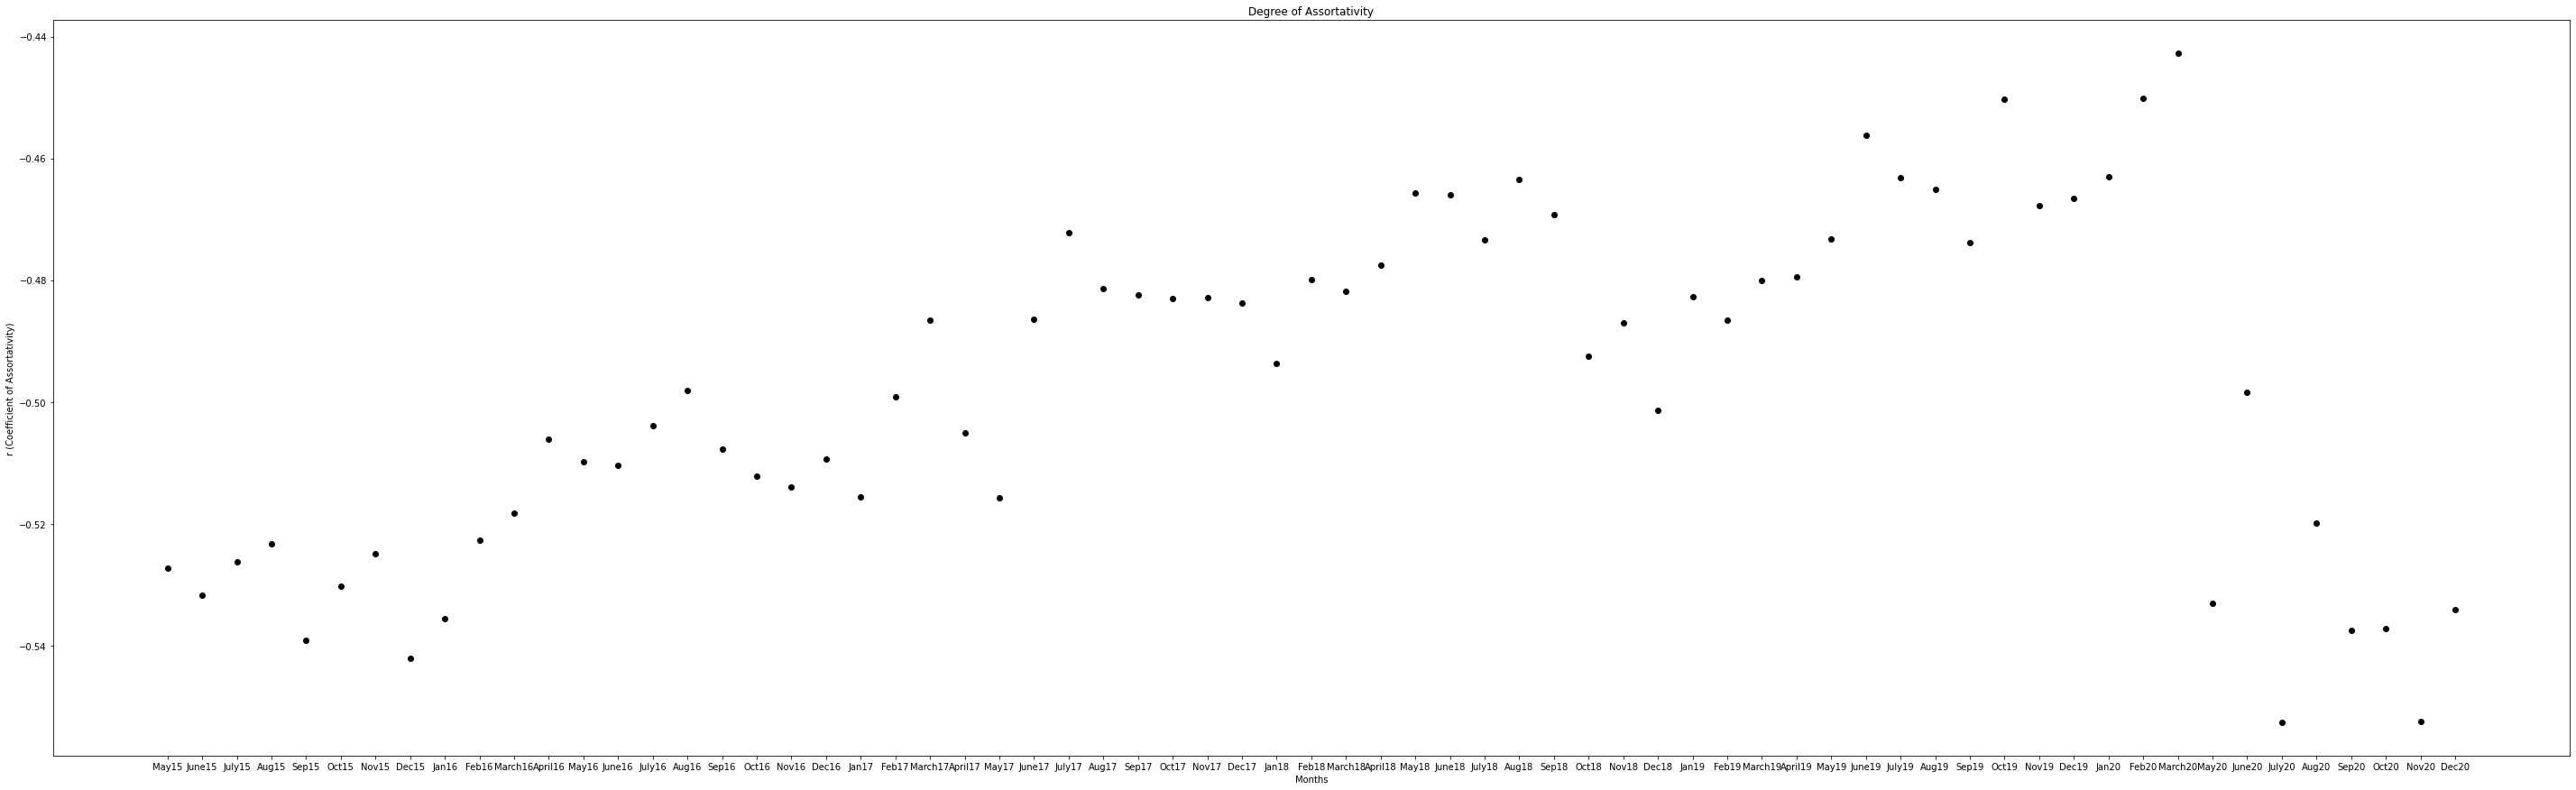

In [14]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls1[i]] = pearson 
    except:
        print(lbls1[i])
print(assortativity)
plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()
    

Degree Distribution

May15


Average clustering coefficient for May15 is 0.6498709231340716
June15


Average clustering coefficient for June15 is 0.6434613629926142
July15


Average clustering coefficient for July15 is 0.6136858940651846
Aug15


Average clustering coefficient for Aug15 is 0.6425104965289116
Sep15


Average clustering coefficient for Sep15 is 0.6937912813593201
Oct15


Average clustering coefficient for Oct15 is 0.6373241272214337
Nov15


Average clustering coefficient for Nov15 is 0.6046984457370973
Dec15


Average clustering coefficient for Dec15 is 0.6894202575685523
Jan16


Average clustering coefficient for Jan16 is 0.69369373832812
Feb16


Average clustering coefficient for Feb16 is 0.6966290773198501
March16


Average clustering coefficient for March16 is 0.6595565049614662
April16


Average clustering coefficient for April16 is 0.6321229251222374
May16


Average clustering coefficient for May16 is 0.6319548680423022
June16


Average clustering coefficient for June16 is 0.63632814176

<ipython-input-10-566d6cf6041f>:75: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
<ipython-input-10-566d6cf6041f>:94: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])


Average clustering coefficient for April20 is 0.0
May20


Average clustering coefficient for May20 is 0.5005764888525713
June20


Average clustering coefficient for June20 is 0.6027726144275517
July20


Average clustering coefficient for July20 is 0.677371907272084
Aug20


Average clustering coefficient for Aug20 is 0.635837175733831
Sep20


Average clustering coefficient for Sep20 is 0.7251840703446114
Oct20


Average clustering coefficient for Oct20 is 0.6834669876143319
Nov20


Average clustering coefficient for Nov20 is 0.6916096150211223
Dec20


Average clustering coefficient for Dec20 is 0.7105132586529491


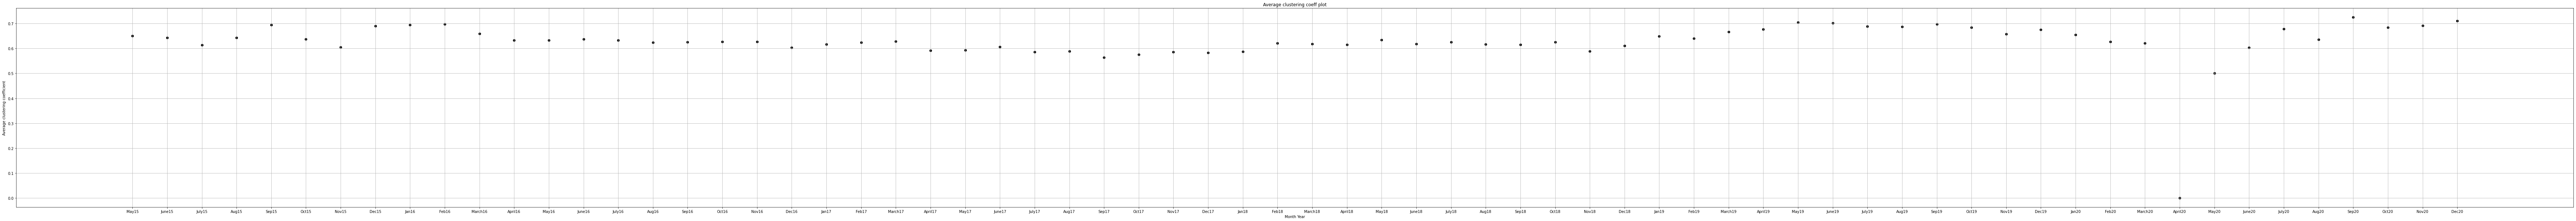

7176

In [10]:
avg_clust_coeff_list = []
def haha(gi):
    print(lbls1[gi])
    G = graphs[gi]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[gi])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[gi])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[gi])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[gi], "is", avg_clust_coeff)
    
    
for gi in range(len(graphs)):
    plt.ioff()
    haha(gi)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [13]:
print(np.mean(np.array(avg_clust_coeff_list)))
print(np.var(np.array(avg_clust_coeff_list)))

0.6270222793594228
0.007558985027879485


In [16]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 548, 2: 3669, 3: 1107, 4: 78}
Characteristic Path length for 1505  is  2.1323583857830433


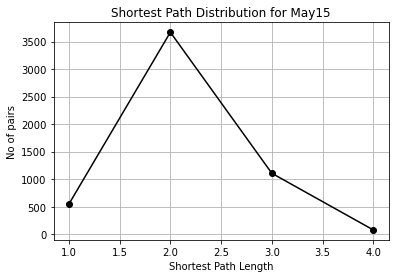



{1: 556, 2: 3747, 3: 1166, 4: 81}
Characteristic Path length for 1506  is  2.139099099099099


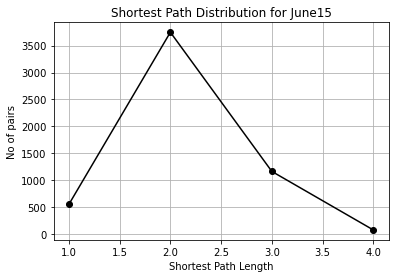



{1: 578, 2: 3784, 3: 1228, 4: 108, 5: 2}
Characteristic Path length for 1507  is  2.152982456140351


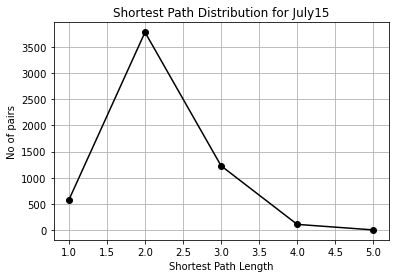



{1: 580, 2: 3824, 3: 1140, 4: 81}
Characteristic Path length for 1508  is  2.1003508771929824


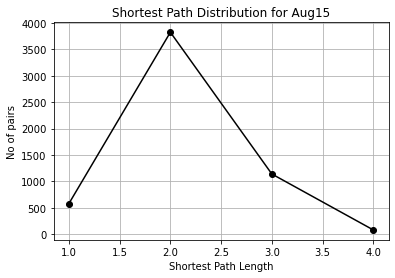



{1: 596, 2: 4221, 3: 1168, 4: 21}
Characteristic Path length for 1509  is  2.1022311022311024


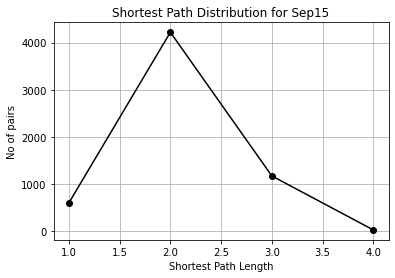



{1: 602, 2: 4076, 3: 1229, 4: 98, 5: 1}
Characteristic Path length for 1510  is  2.1375291375291376


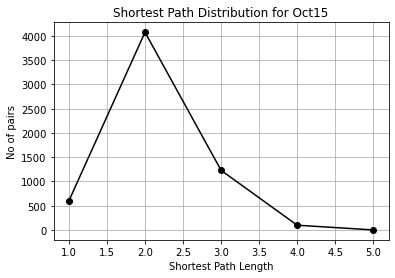



{1: 594, 2: 3874, 3: 1137, 4: 94, 5: 1}
Characteristic Path length for 1511  is  2.1287719298245613


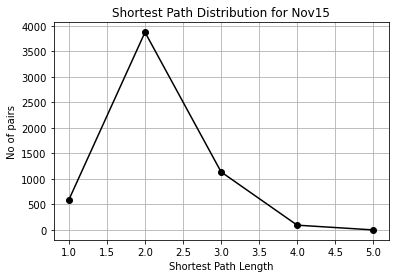



{1: 601, 2: 3952, 3: 906, 4: 17}
Characteristic Path length for 1512  is  2.0344144144144143


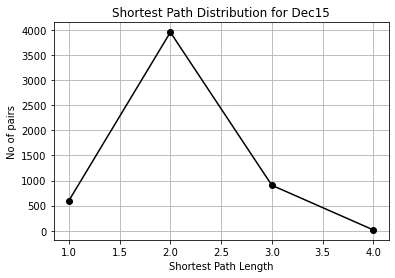



{1: 581, 2: 3970, 3: 909, 4: 16}
Characteristic Path length for 1601  is  2.0381981981981983


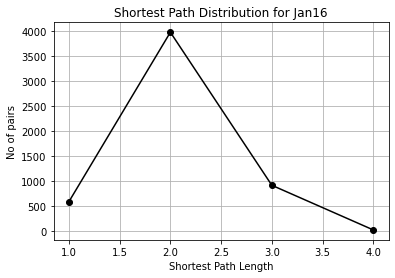



{1: 594, 2: 3924, 3: 868, 4: 16}
Characteristic Path length for 1602  is  2.056645686782673


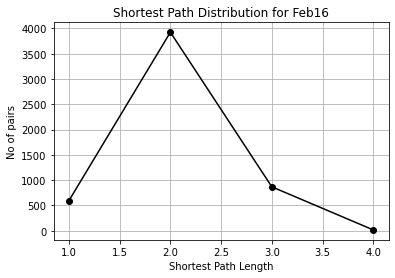



{1: 617, 2: 4042, 3: 875, 4: 16}
Characteristic Path length for 1603  is  2.052252252252252


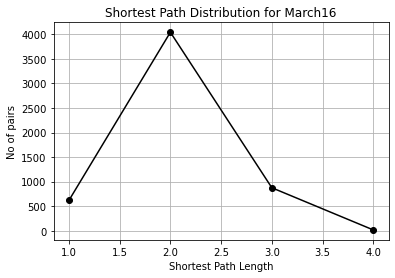



{1: 613, 2: 3787, 3: 868, 4: 60}
Characteristic Path length for 1604  is  1.9875675675675675


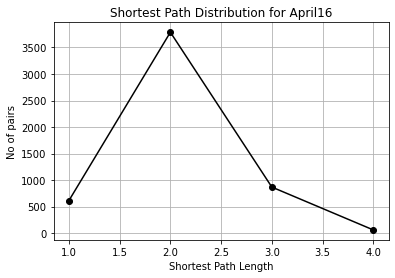



{1: 605, 2: 3818, 3: 855, 4: 50}
Characteristic Path length for 1605  is  1.983063063063063


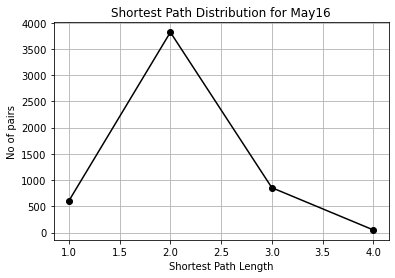



{1: 603, 2: 3672, 3: 730, 4: 35}
Characteristic Path length for 1606  is  1.955289193302892


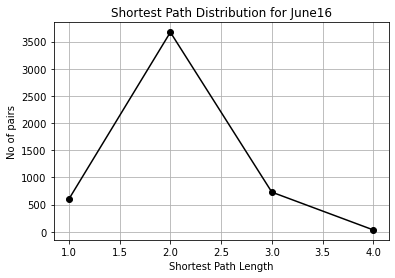



{1: 596, 2: 3554, 3: 714, 4: 35}
Characteristic Path length for 1607  is  1.9534428794992176


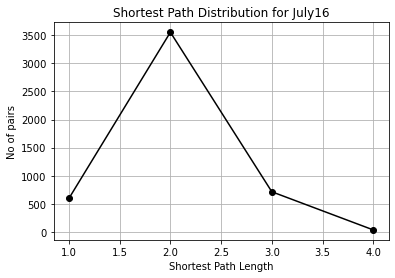



{1: 601, 2: 3643, 3: 929, 4: 82, 5: 1}
Characteristic Path length for 1608  is  2.094178082191781


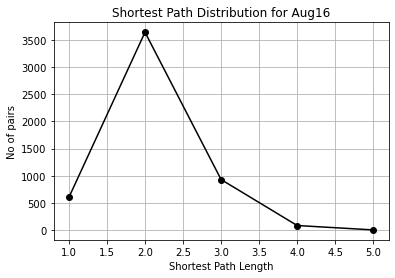



{1: 598, 2: 3665, 3: 912, 4: 80, 5: 1}
Characteristic Path length for 1609  is  2.0907534246575343


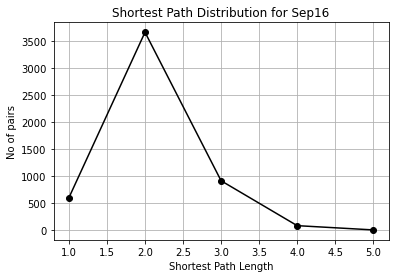



{1: 608, 2: 3672, 3: 842, 4: 60, 5: 1}
Characteristic Path length for 1610  is  1.9850055534987041


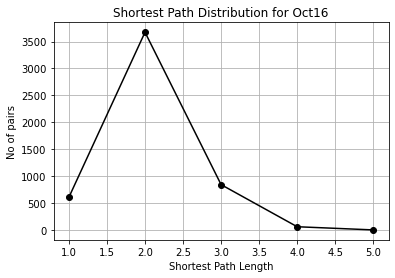



{1: 617, 2: 3734, 3: 1013, 4: 38}
Characteristic Path length for 1611  is  2.087375046279156


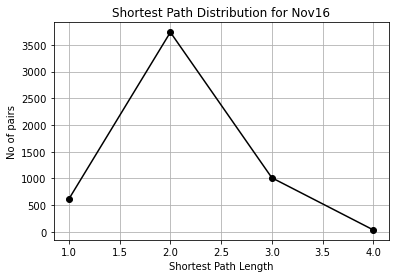



{1: 610, 2: 3847, 3: 1055, 4: 38}
Characteristic Path length for 1612  is  2.093873873873874


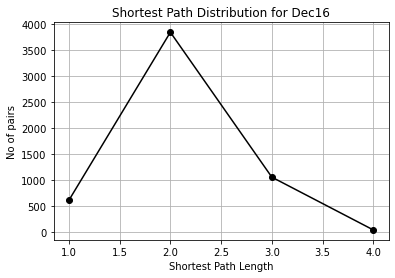



{1: 599, 2: 3829, 3: 955, 4: 19}
Characteristic Path length for 1701  is  2.0729359496482784


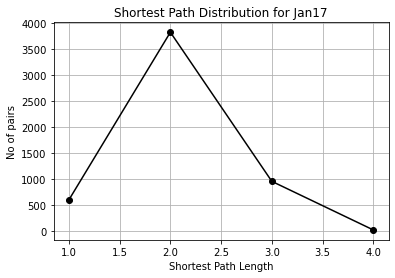



{1: 635, 2: 3970, 3: 927, 4: 18}
Characteristic Path length for 1702  is  2.059099099099099


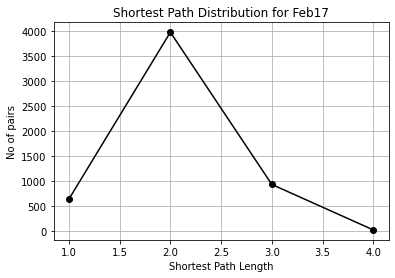



{1: 652, 2: 4092, 3: 940, 4: 16}
Characteristic Path length for 1703  is  2.056140350877193


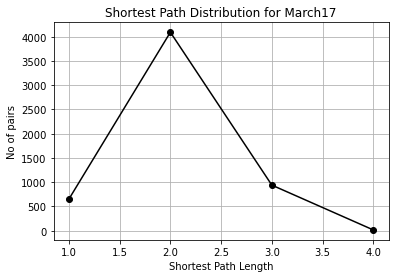



{1: 629, 2: 4215, 3: 1158, 4: 4}
Characteristic Path length for 1704  is  2.089410589410589


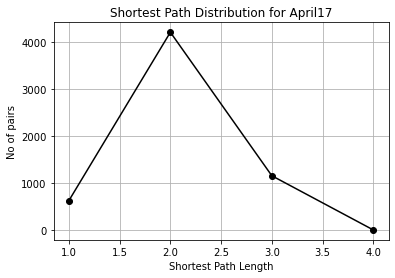



{1: 629, 2: 4251, 3: 1122, 4: 4}
Characteristic Path length for 1705  is  2.083416583416583


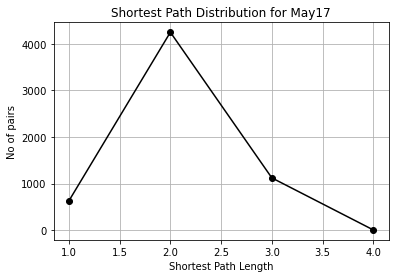



{1: 665, 2: 4190, 3: 1128, 4: 23}
Characteristic Path length for 1706  is  2.084748584748585


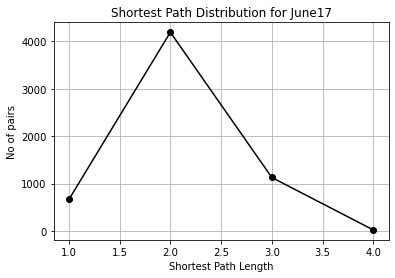



{1: 690, 2: 4381, 3: 1224, 4: 25}
Characteristic Path length for 1707  is  2.0924050632911393


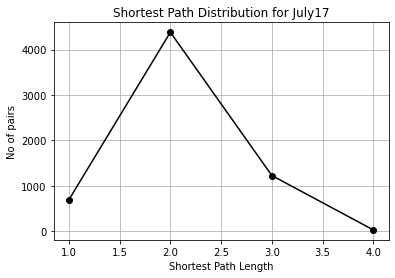



{1: 681, 2: 4314, 3: 1299, 4: 26}
Characteristic Path length for 1708  is  2.106012658227848


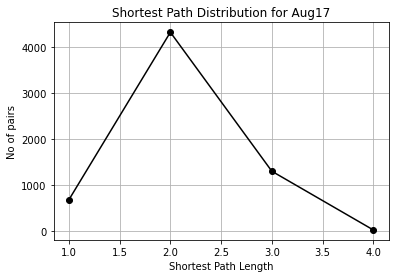



{1: 706, 2: 4659, 3: 1418, 4: 23}
Characteristic Path length for 1709  is  2.1113723185424624


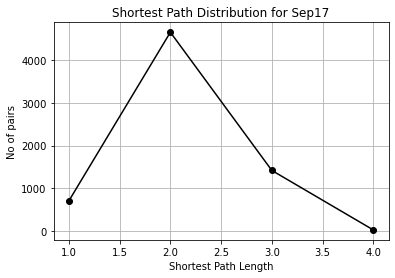



{1: 746, 2: 5029, 3: 1513, 4: 22}
Characteristic Path length for 1710  is  2.1109439124487004


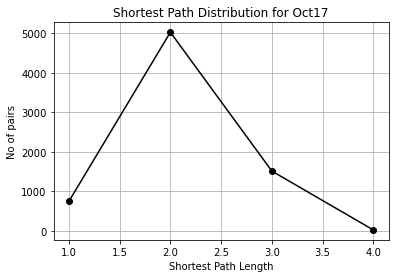



{1: 744, 2: 5076, 3: 1468, 4: 22}
Characteristic Path length for 1711  is  2.105061559507524


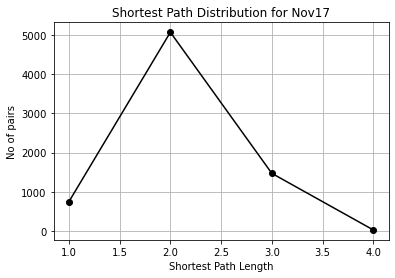



{1: 780, 2: 5219, 3: 1483}
Characteristic Path length for 1712  is  2.0939588345362203


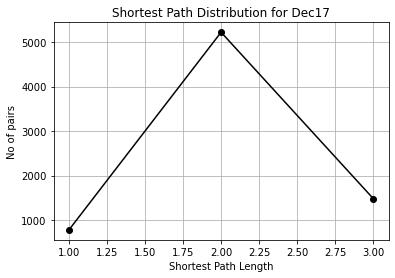



{1: 784, 2: 5235, 3: 1462, 4: 1}
Characteristic Path length for 1801  is  2.090884790163058


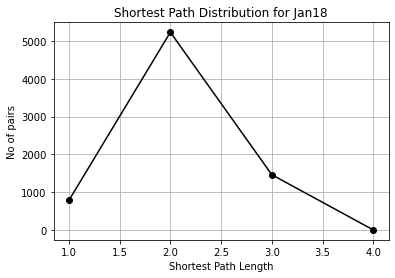



{1: 821, 2: 5440, 3: 1570, 4: 1}
Characteristic Path length for 1802  is  2.095888661899898


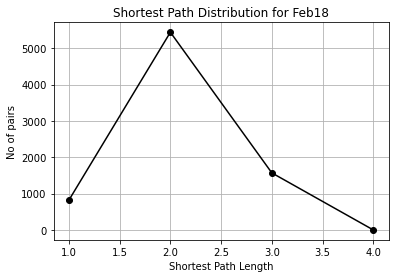



{1: 840, 2: 5581, 3: 1566, 4: 23}
Characteristic Path length for 1803  is  2.096379525593009


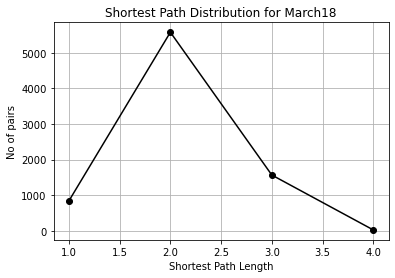



{1: 810, 2: 5966, 3: 1753, 4: 27}
Characteristic Path length for 1804  is  2.116526414212249


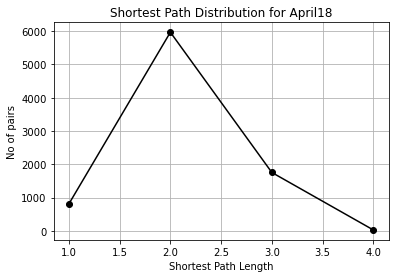



{1: 845, 2: 6303, 3: 1757, 4: 25}
Characteristic Path length for 1805  is  2.107726763717805


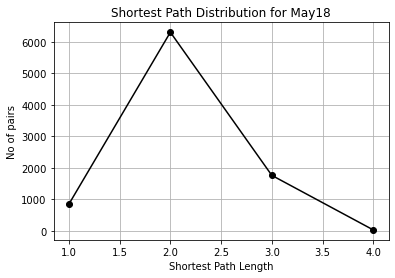



{1: 852, 2: 6216, 3: 1836, 4: 26}
Characteristic Path length for 1806  is  2.116013437849944


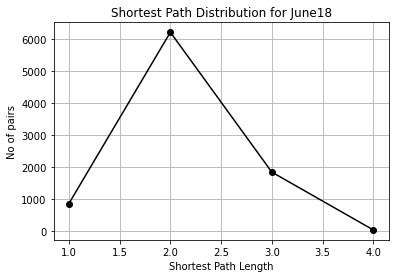



{1: 849, 2: 6295, 3: 1919, 4: 57}
Characteristic Path length for 1807  is  2.1298245614035087


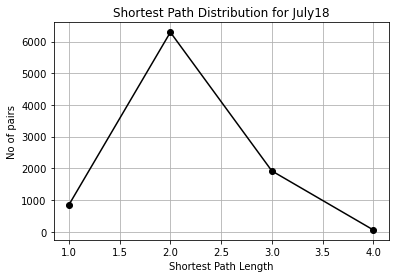



{1: 861, 2: 6325, 3: 2067, 4: 59}
Characteristic Path length for 1808  is  2.1421821305841924


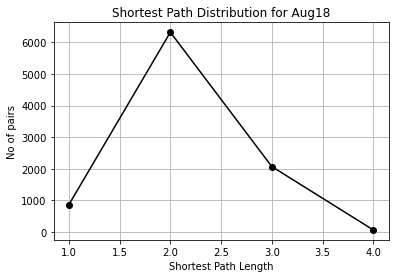



{1: 873, 2: 6333, 3: 2048, 4: 58}
Characteristic Path length for 1809  is  2.138638316151203


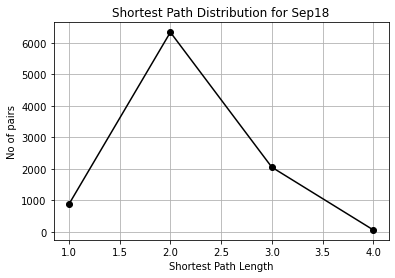



{1: 894, 2: 6406, 3: 1630}
Characteristic Path length for 1810  is  2.0824188129899217


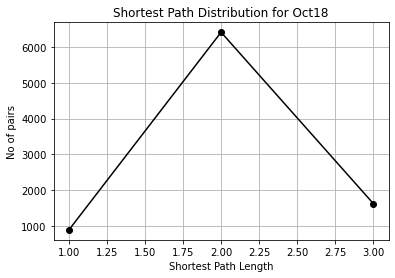



{1: 881, 2: 6074, 3: 1510}
Characteristic Path length for 1811  is  2.008579272477694


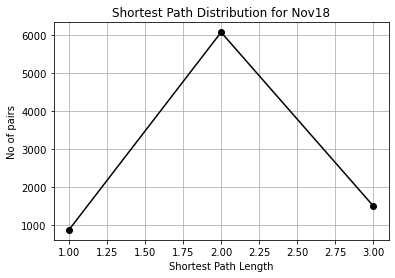



{1: 891, 2: 6326, 3: 1620}
Characteristic Path length for 1812  is  2.017872807017544


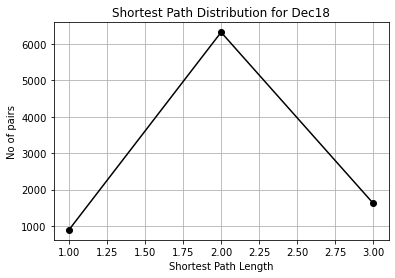



{1: 954, 2: 6648, 3: 1842, 4: 61, 5: 1}
Characteristic Path length for 1901  is  2.106564275194614


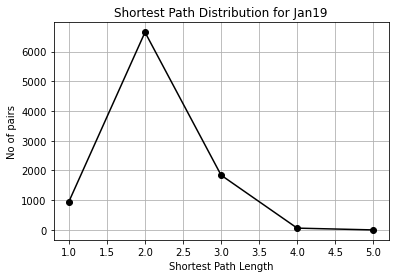



{1: 949, 2: 6393, 3: 1677, 4: 7}
Characteristic Path length for 1902  is  2.0182560137457046


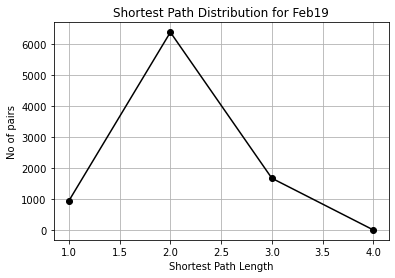



{1: 967, 2: 6584, 3: 1761}
Characteristic Path length for 1903  is  2.085266323024055


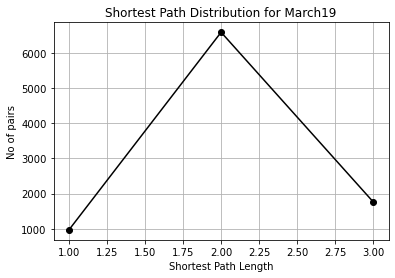



{1: 922, 2: 6586, 3: 1947, 4: 51}
Characteristic Path length for 1904  is  2.118556701030928


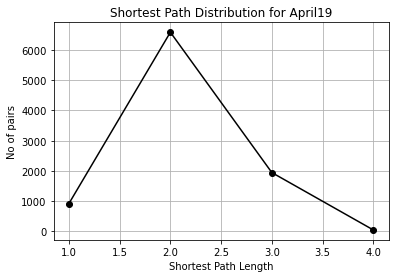



{1: 925, 2: 6610, 3: 1919, 4: 52}
Characteristic Path length for 1905  is  2.115505996212918


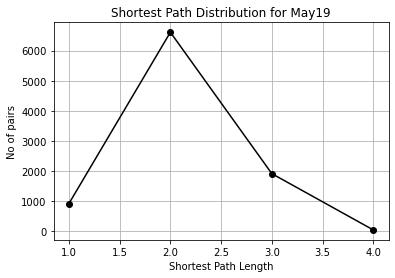



{1: 945, 2: 6528, 3: 1789, 4: 50}
Characteristic Path length for 1906  is  2.1013745704467355


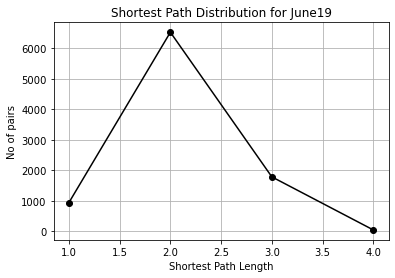



{1: 932, 2: 6494, 3: 1790}
Characteristic Path length for 1907  is  2.071520618556701


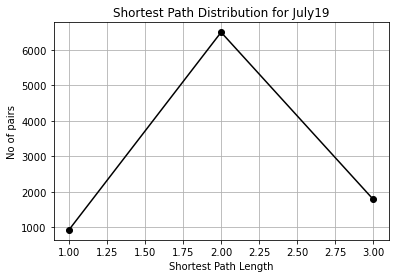



{1: 907, 2: 6584, 3: 1821}
Characteristic Path length for 1908  is  2.098152920962199


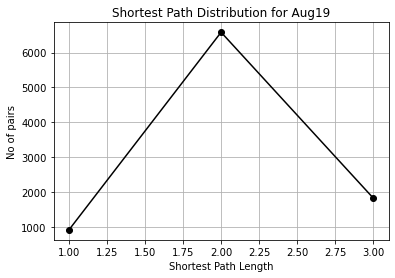



{1: 939, 2: 6830, 3: 1920, 4: 13}
Characteristic Path length for 1909  is  2.103793032364461


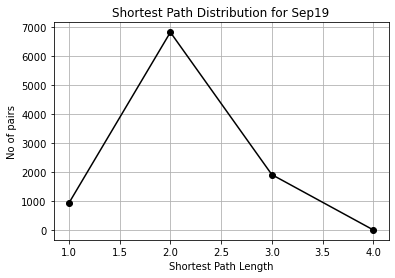



{1: 1025, 2: 6974, 3: 1729, 4: 171, 5: 1}
Characteristic Path length for 1910  is  2.105959595959596


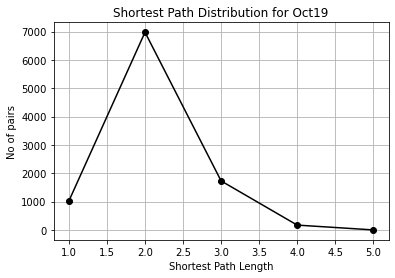



{1: 995, 2: 7084, 3: 1978, 4: 43}
Characteristic Path length for 1911  is  2.1058415841584157


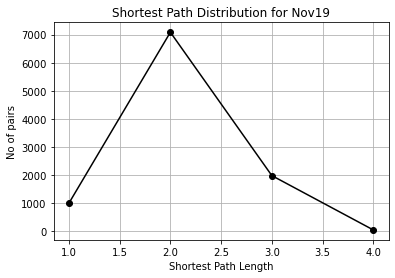



{1: 1005, 2: 7075, 3: 1977, 4: 43}
Characteristic Path length for 1912  is  2.104752475247525


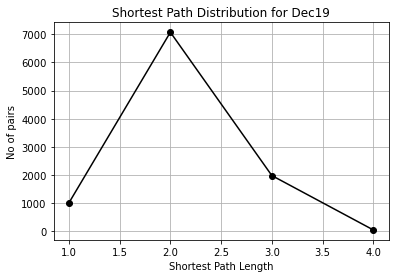



{1: 1008, 2: 7061, 3: 2186, 4: 47}
Characteristic Path length for 2001  is  2.1234711706464764


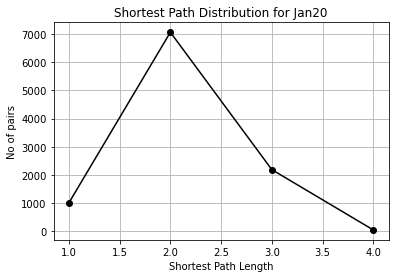



{1: 1017, 2: 7061, 3: 2177, 4: 47}
Characteristic Path length for 2002  is  2.1217239370995924


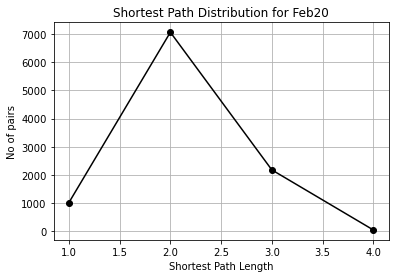



{1: 1033, 2: 7099, 3: 2327, 4: 47}
Characteristic Path length for 2003  is  2.132114981915096


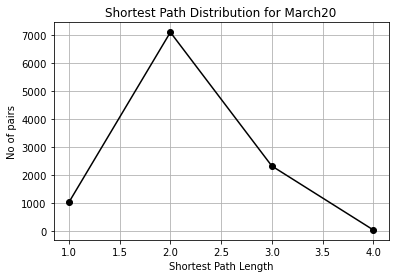



{}
Characteristic Path length for 2004  can't be defined


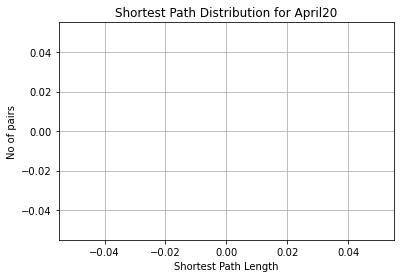



{1: 391, 2: 3617, 3: 2204, 4: 185, 5: 2}
Characteristic Path length for 2005  is  2.256398675097862


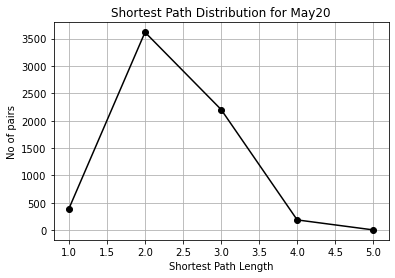



{1: 574, 2: 4600, 3: 2444, 4: 181, 5: 34}
Characteristic Path length for 2006  is  2.247191011235955


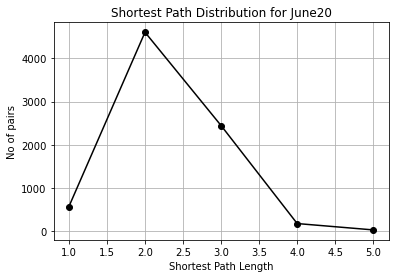



{1: 621, 2: 5319, 3: 2234, 4: 16}
Characteristic Path length for 2007  is  2.153010033444816


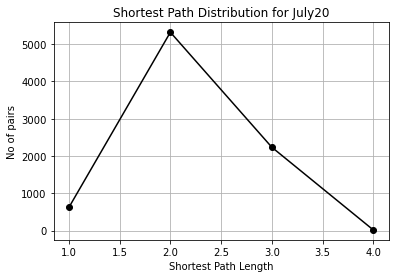



{1: 684, 2: 5330, 3: 1973, 4: 111, 5: 2}
Characteristic Path length for 2008  is  2.163247863247863


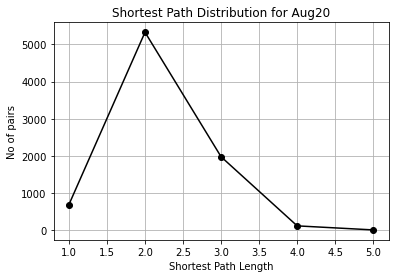



{1: 787, 2: 5909, 3: 1820, 4: 40}
Characteristic Path length for 2009  is  2.130084151472651


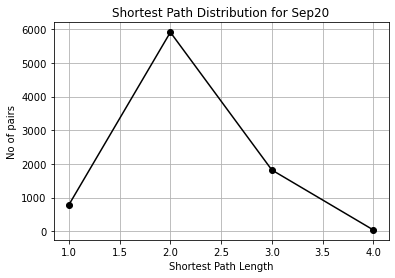



{1: 830, 2: 6286, 3: 1912, 4: 91, 5: 1}
Characteristic Path length for 2010  is  2.138925438596491


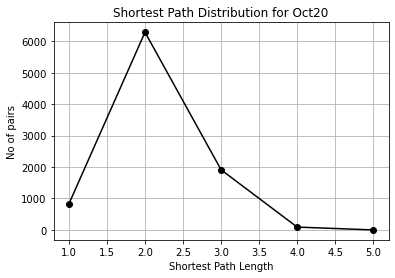



{1: 845, 2: 6713, 3: 1852, 4: 95, 5: 1}
Characteristic Path length for 2011  is  2.1262360614348834


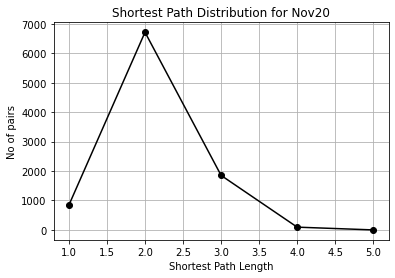



{1: 904, 2: 6815, 3: 1697, 4: 89, 5: 1}
Characteristic Path length for 2012  is  2.1024616031979804


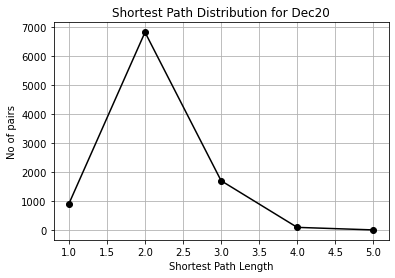

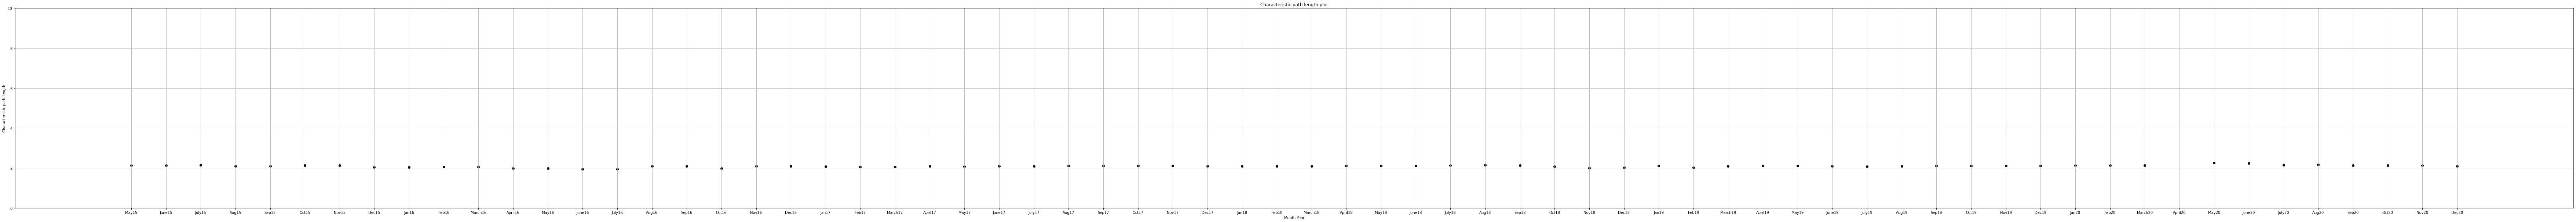

6930

In [14]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.grid(True)
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.grid(True)
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [24]:
c_list = np.delete(np.array(char_path_len_list),-9)
print(np.mean(c_list))
print(np.var(c_list))

2.0946900336640204
0.002872771847339885


In [21]:
np.delete(np.array(char_path_len_list),-9)

array([2.1323583857830433, 2.139099099099099, 2.152982456140351,
       2.1003508771929824, 2.1022311022311024, 2.1375291375291376,
       2.1287719298245613, 2.0344144144144143, 2.0381981981981983,
       2.056645686782673, 2.052252252252252, 1.9875675675675675,
       1.983063063063063, 1.955289193302892, 1.9534428794992176,
       2.094178082191781, 2.0907534246575343, 1.9850055534987041,
       2.087375046279156, 2.093873873873874, 2.0729359496482784,
       2.059099099099099, 2.056140350877193, 2.089410589410589,
       2.083416583416583, 2.084748584748585, 2.0924050632911393,
       2.106012658227848, 2.1113723185424624, 2.1109439124487004,
       2.105061559507524, 2.0939588345362203, 2.090884790163058,
       2.095888661899898, 2.096379525593009, 2.116526414212249,
       2.107726763717805, 2.116013437849944, 2.1298245614035087,
       2.1421821305841924, 2.138638316151203, 2.0824188129899217,
       2.008579272477694, 2.017872807017544, 2.106564275194614,
       2.018256013745

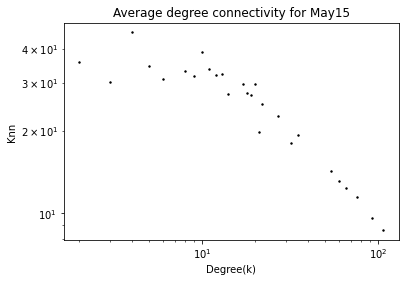

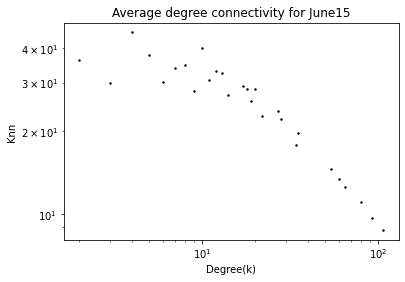

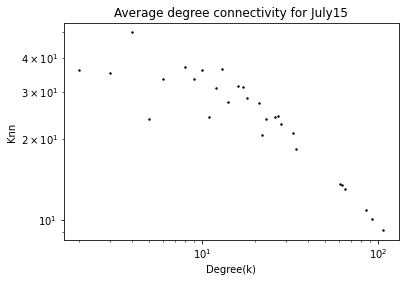

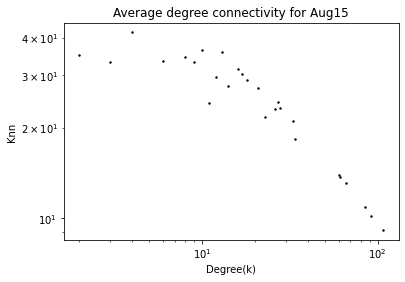

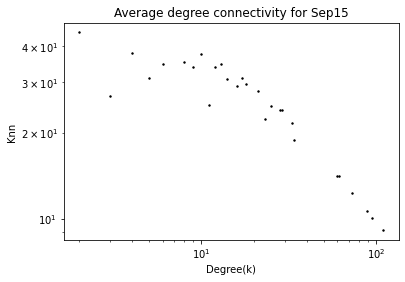

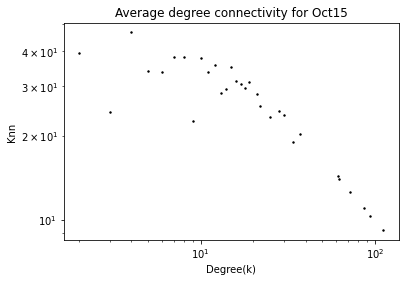

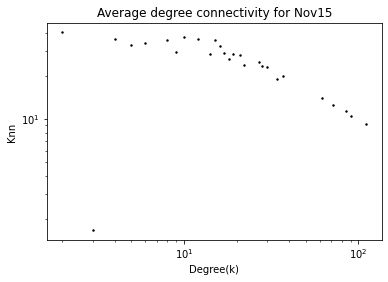

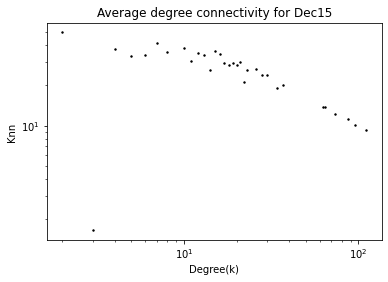

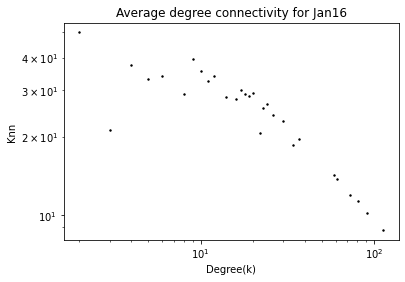

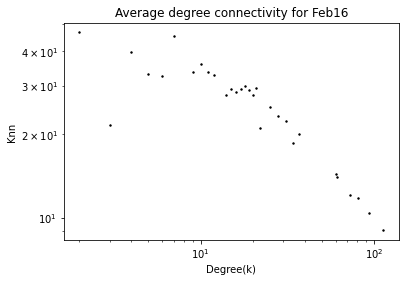

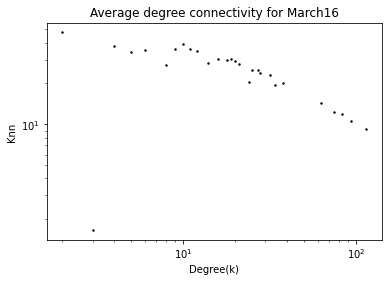

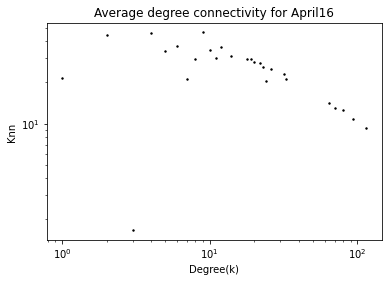

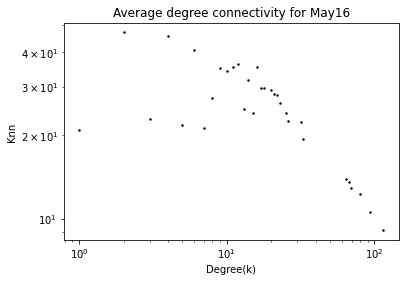

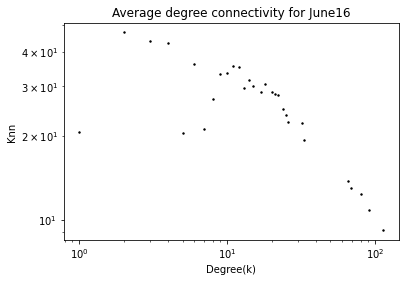

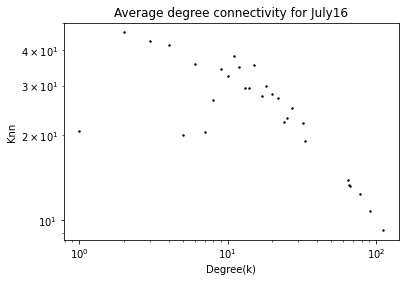

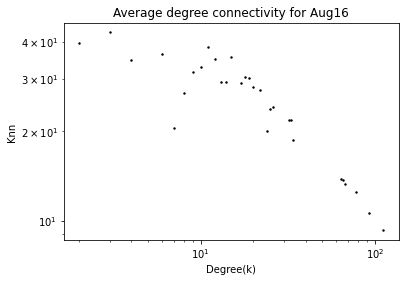

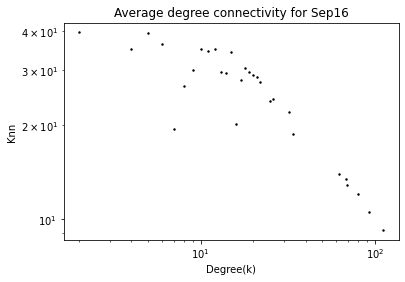

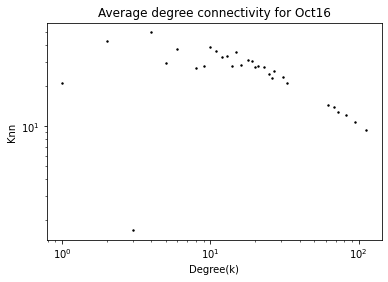

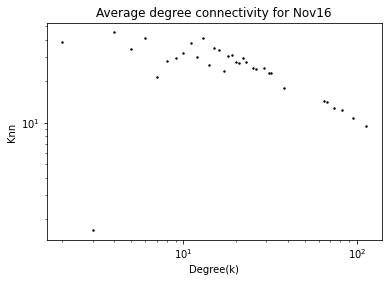

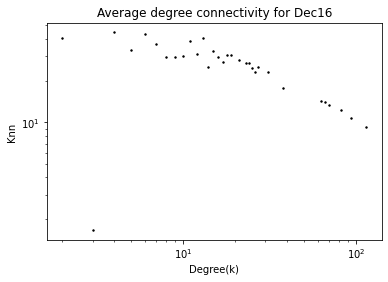

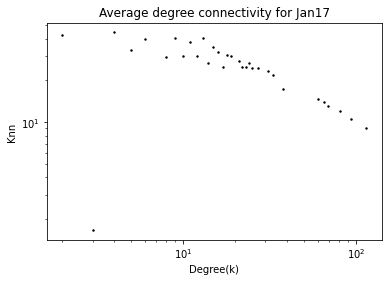

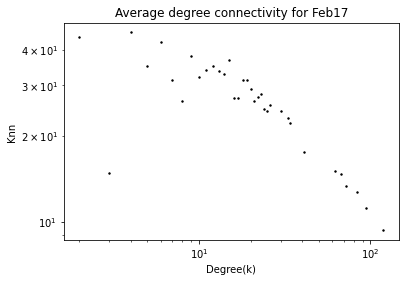

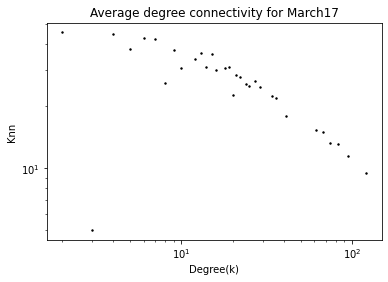

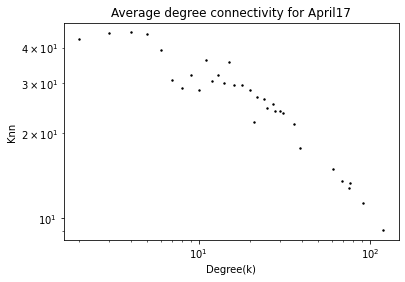

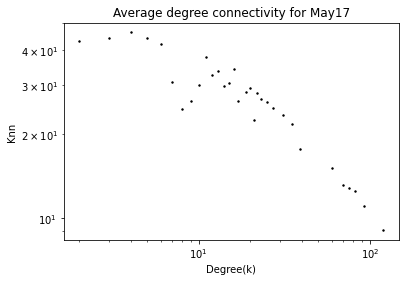

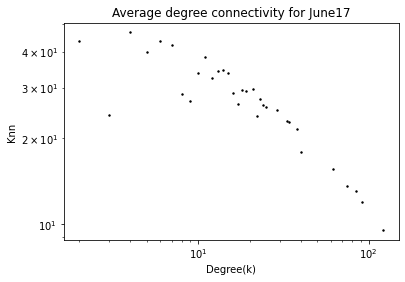

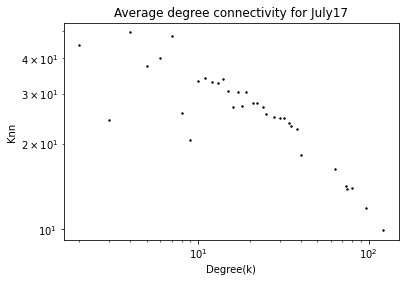

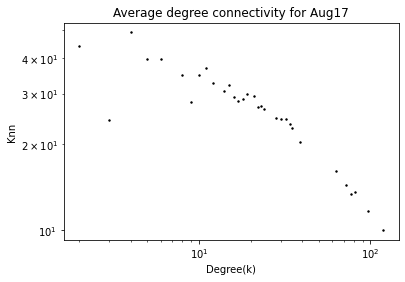

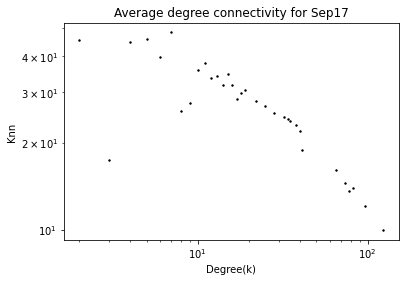

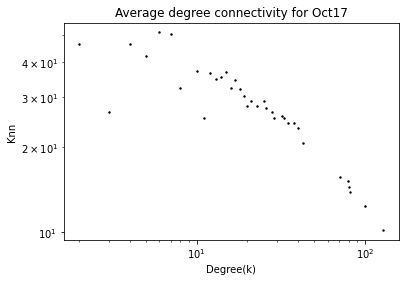

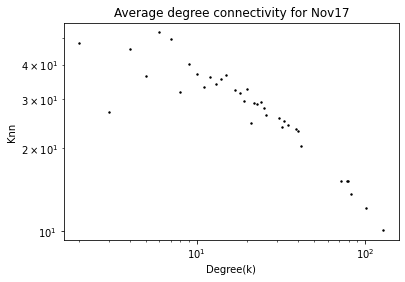

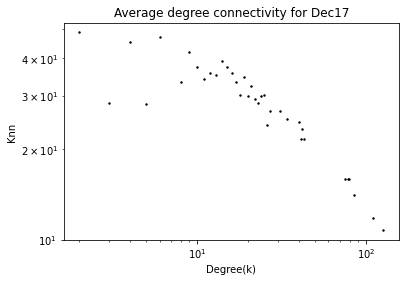

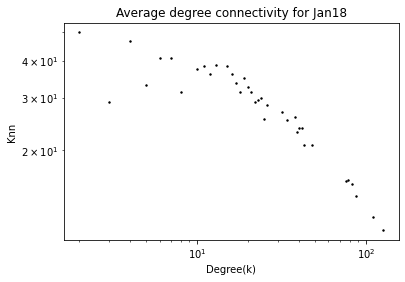

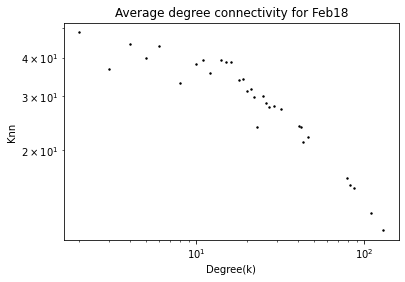

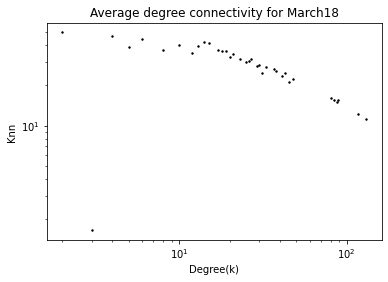

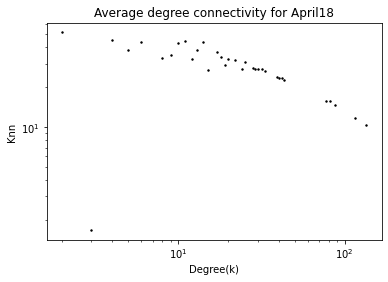

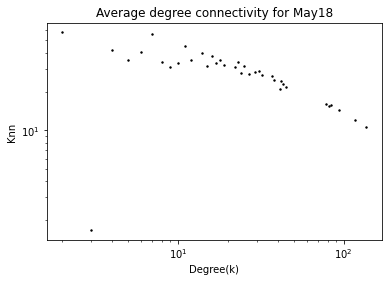

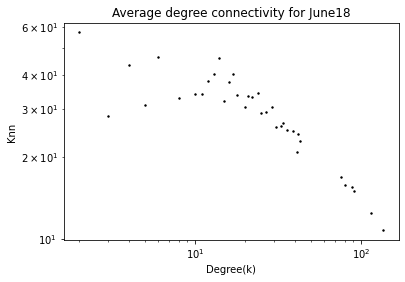

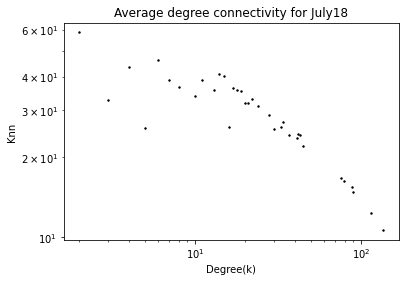

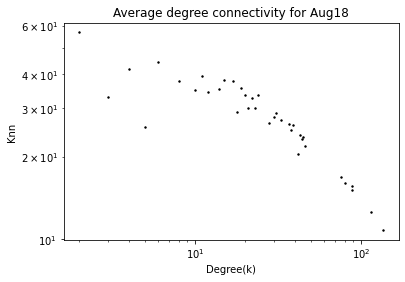

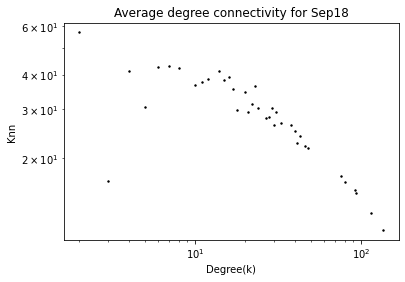

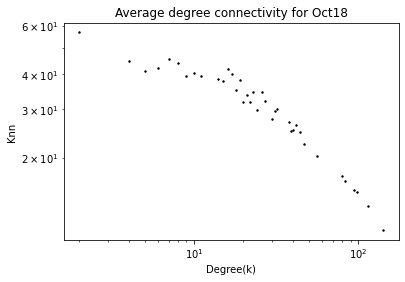

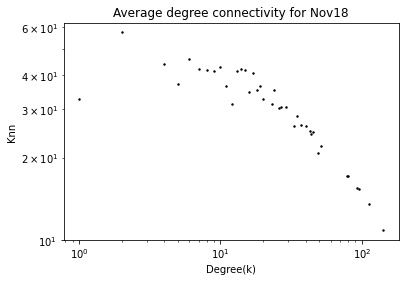

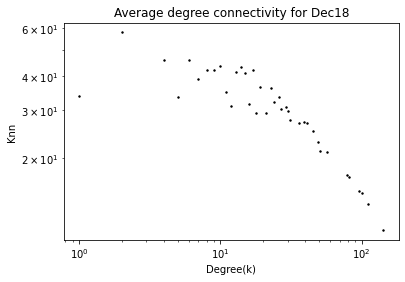

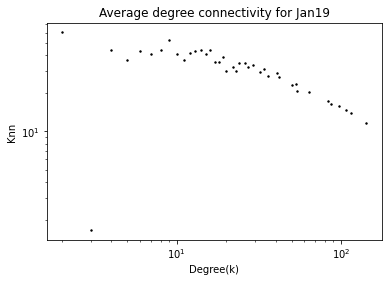

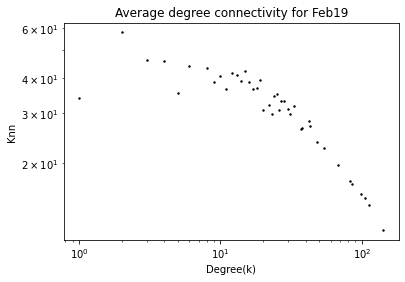

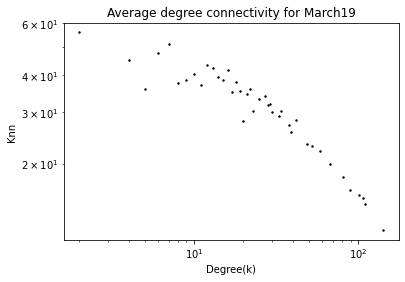

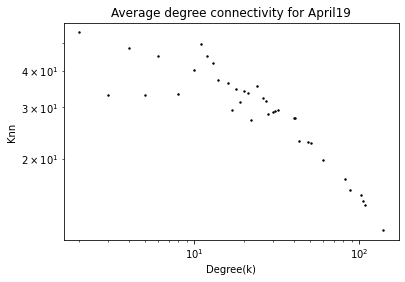

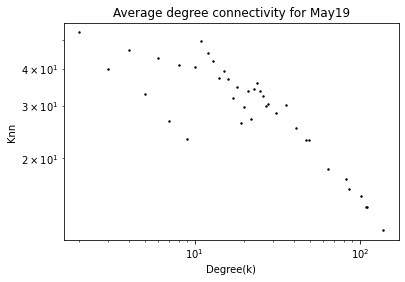

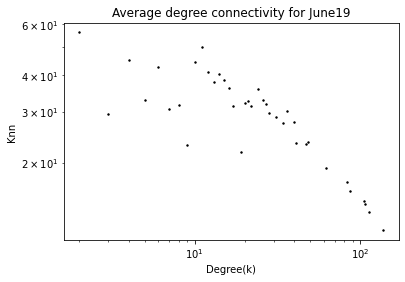

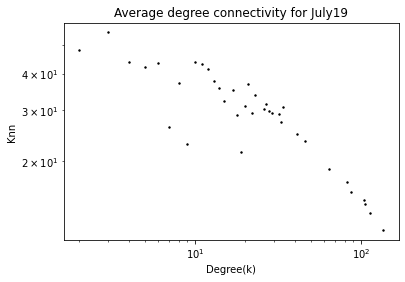

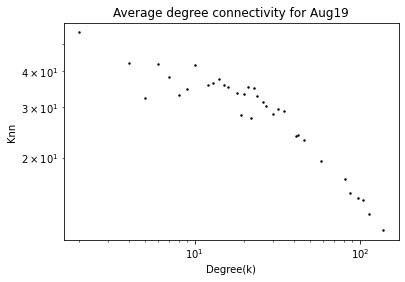

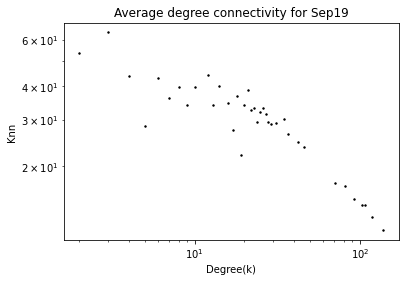

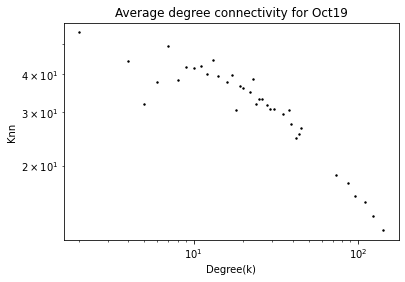

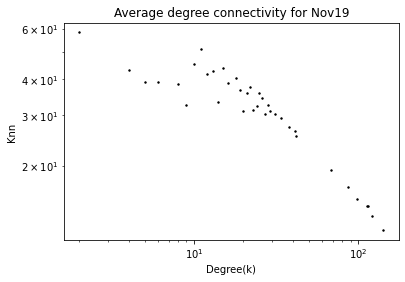

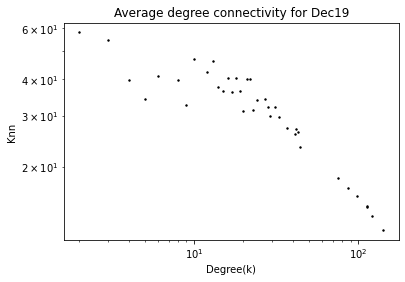

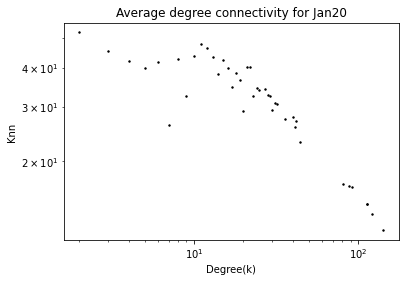

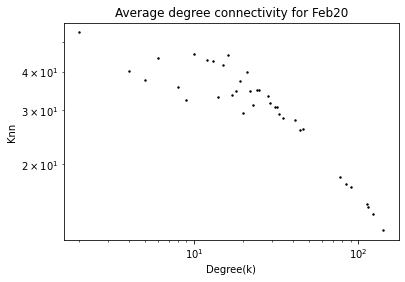

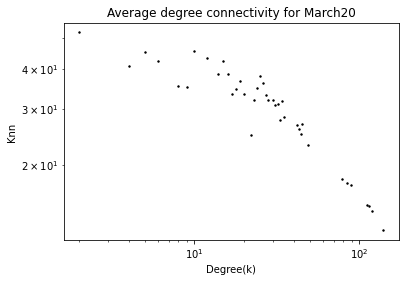

c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if sys.path[0] == '':


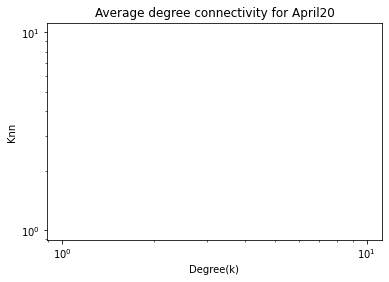

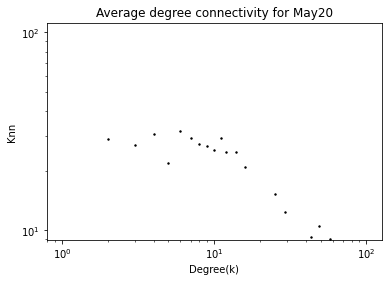

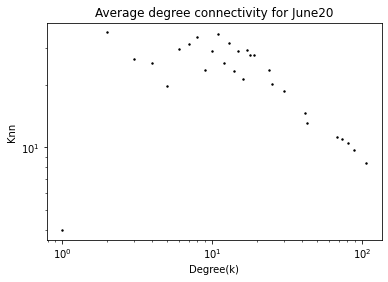

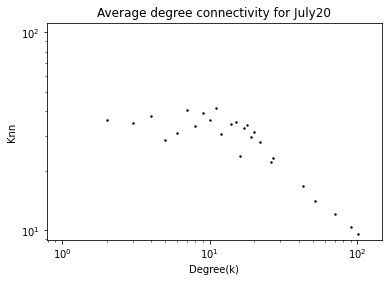

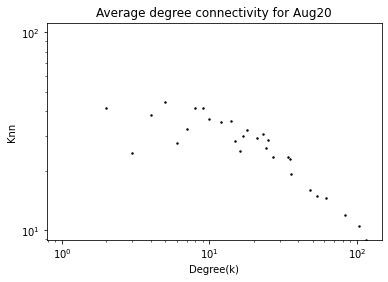

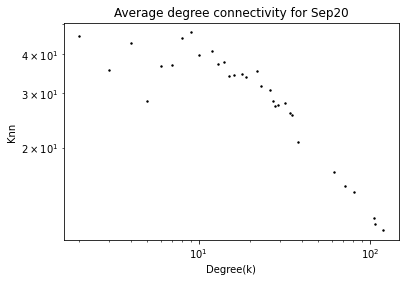

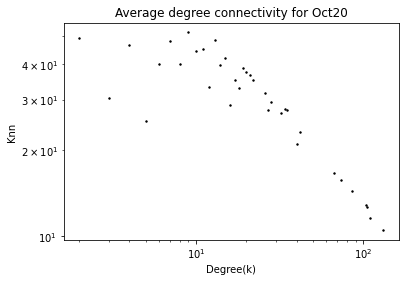

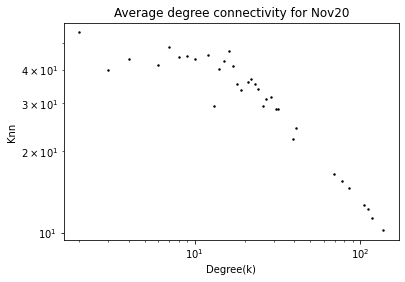

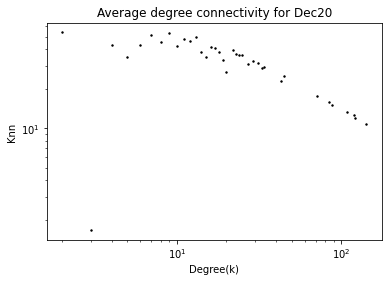

In [19]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()